In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pathlib import Path
import os

In [2]:
os.chdir(str(Path(os.getcwd()).parent / 'Data'))

# Constructing the Model Space

In [3]:
homeless_students_coc_rates = pd.read_csv('doe_homeless_students_coc_agg_rates.csv')
pit_ard_data = pd.read_csv('pit_ard_merged_cleaned.csv')
spm_data = pd.read_csv('spms_only_cleaned.csv')

In [4]:
homeless_students_coc_rates['year'] = pd.Series([int(yr[5:]) for yr in homeless_students_coc_rates['year']])
homeless_students_coc_rates.head()

,year,cocnumber,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,doe_hotel_motel_rate,doe_doubled_up_rate
0,2015,AK-500,62,-46,39,-45,114
1,2016,AK-500,688,64,268,12,344
2,2017,AK-500,-429,13,-365,-70,-7
3,2015,AK-501,118,11,86,-14,4
4,2016,AK-501,237,33,16,37,164


In [5]:
pit_ard_data.rename(columns = {'coc_number':'cocnumber'}, inplace = True)
pit_ard_data.head()

,year,cocnumber,coc_number_and_name,pprn,estimated_ard,bonus,coc_planning,State,coc_name,coc_category,...,pit_homeless_parenting_youth_age_18_to_24,pit_sheltered_es_homeless_parenting_youth_age_18_to_24,pit_sheltered_th_homeless_parenting_youth_age_18_to_24,pit_sheltered_total_homeless_parenting_youth_age_18_to_24,pit_unsheltered_homeless_parenting_youth_age_18_to_24,pit_homeless_children_of_parenting_youth,pit_sheltered_es_homeless_children_of_parenting_youth,pit_sheltered_th_homeless_children_of_parenting_youth,pit_sheltered_total_homeless_children_of_parenting_youth,pit_unsheltered_homeless_children_of_parenting_youth
0,2018,AK-500,AK-500-ANCHORAGE,1293735,2847097,170826,85413,AK,Anchorage CoC,Other Urban CoCs,...,14.0,6.0,8.0,14.0,0.0,14.0,5.0,9.0,14.0,0.0
1,2018,AK-501,AK-501-ALASKA BALANCE OF STATE,756772,776502,46590,23295,AK,Alaska Balance of State CoC,Rural CoCs,...,11.0,8.0,1.0,9.0,2.0,12.0,9.0,1.0,10.0,2.0
2,2018,AL-500,"AL-500-BIRMINGHAM,JEFFERSON,ST.CLAIR,SHELBY CO...",6505662,9109238,546554,273277,AL,"Birmingham/Jefferson, St. Clair, Shelby Counti...",Suburban CoCs,...,3.0,1.0,2.0,3.0,0.0,7.0,1.0,6.0,7.0,0.0
3,2018,AL-501,"AL-501-MOBILE CITY & COUNTY,BALDWIN COUNTY",3230092,3741586,224495,112248,AL,Mobile City & County/Baldwin County CoC,Other Urban CoCs,...,9.0,4.0,1.0,5.0,4.0,12.0,8.0,1.0,9.0,3.0
4,2018,AL-502,"AL-502-FLORENCE,NORTHWEST ALABAMA",629035,447309,37742,18871,AL,Florence/Northwest Alabama CoC,Rural CoCs,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [5]:
spm_data = spm_data.drop(columns = 'coc_name')
spm_data = spm_data = spm_data.rename(columns = {'coc_number' : 'cocnumber'})
spm_data.head()

,year,state,cocnumber,spm2_total_persons_exited_so_es_th_sh_ph,spm2_total_persons_returns_in_6_mths,spm2_total_persons_returns_in_12_mths_should_include_the_6_month_cohort,spm2_total_persons_returns_in_24_mths_should_include_both_the_6_and_12_month_cohort
0,2017,AK,AK-500,998,131,171,236
1,2017,AK,AK-501,272,13,24,34
2,2017,AL,AL-500,736,205,303,392
3,2017,AL,AL-501,220,25,44,50
4,2017,AL,AL-502,0,0,0,0


In [135]:
modeling_data_space = pd.merge(spm_data, homeless_students_coc_rates)
modeling_data_space = pd.merge(modeling_data_space, pit_ard_data[['year', 'cocnumber', 'pprn', 'estimated_ard', 'bonus', 
                                                                 'coc_planning', 'coc_category']])
modeling_data_space = pd.concat([modeling_data_space, pd.get_dummies(modeling_data_space['coc_category'])], axis = 1)
modeling_data_space.to_csv('modeling_data_space', index = False)
modeling_data_space.head()


,year,state,cocnumber,total_returns,0_to_6_month_returns,6_to_12_month_returns,12_to_24_month_returns,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,...,doe_doubled_up_rate,pprn,estimated_ard,bonus,coc_planning,coc_category,Major Cities,Other Urban CoCs,Rural CoCs,Suburban CoCs
0,2015,AK,AK-500,680,119,31,43,62,-46,39,...,114,1138309,2824705,423706,84741,Other Urban CoCs,0,1,0,0
1,2016,AK,AK-500,871,172,41,48,688,64,268,...,344,1169576,2891188,144559,86736,Other Urban CoCs,0,1,0,0
2,2017,AK,AK-500,998,131,40,65,-429,13,-365,...,-7,1210110,2849941,170996,85498,Other Urban CoCs,0,1,0,0
3,2015,AK,AK-501,89,7,3,8,118,11,86,...,4,602107,807072,121061,24212,Rural CoCs,0,0,1,0
4,2016,AK,AK-501,168,3,4,6,237,33,16,...,164,669635,738551,36928,22157,Rural CoCs,0,0,1,0


# Model Space EDA


In [136]:
len(modeling_data_space)

1154

In [137]:
modeling_data_space.isna().sum()

year                      0
state                     0
cocnumber                 0
total_returns             0
0_to_6_month_returns      0
6_to_12_month_returns     0
12_to_24_month_returns    0
doe_total_rate            0
doe_unsheltered_rate      0
doe_sheltered_rate        0
doe_hotel_motel_rate      0
doe_doubled_up_rate       0
pprn                      0
estimated_ard             0
bonus                     0
coc_planning              0
coc_category              0
Major Cities              0
Other Urban CoCs          0
Rural CoCs                0
Suburban CoCs             0
dtype: int64

total_returns  ,  2015


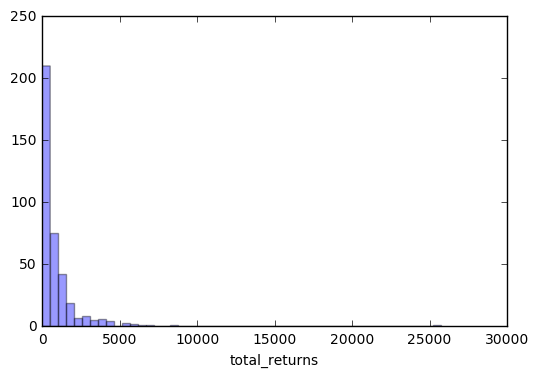

total_returns  ,  2016


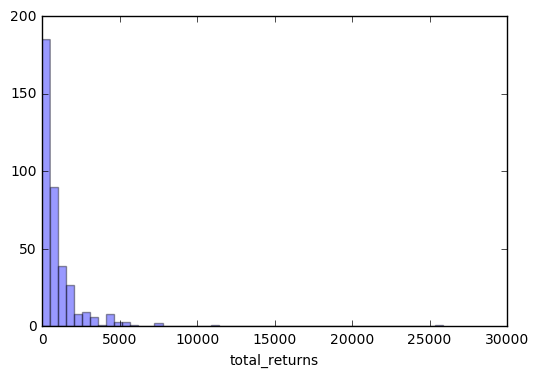

total_returns  ,  2017


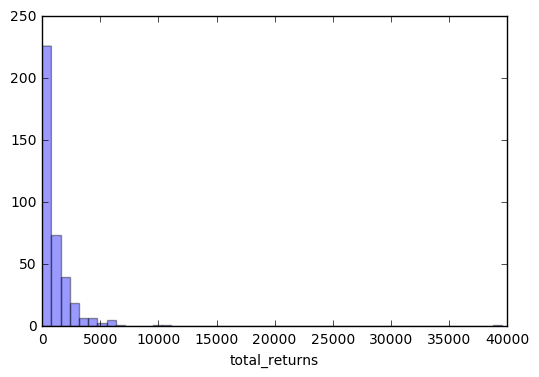

0_to_6_month_returns  ,  2015


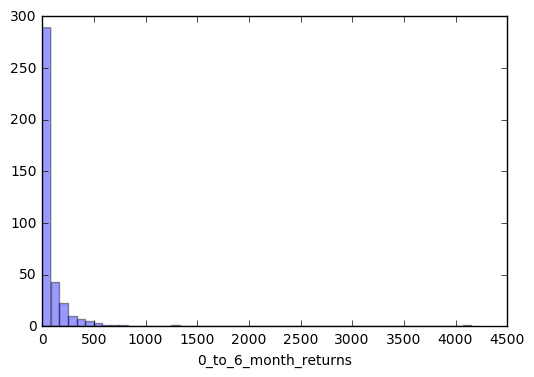

0_to_6_month_returns  ,  2016


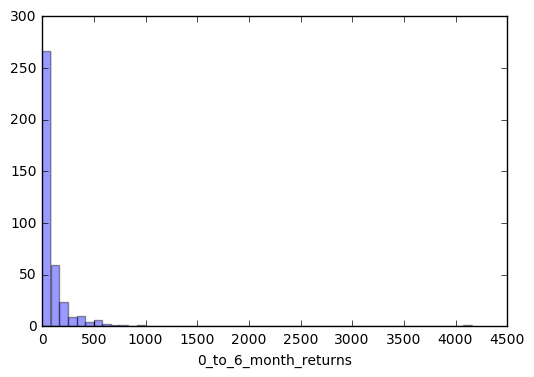

0_to_6_month_returns  ,  2017


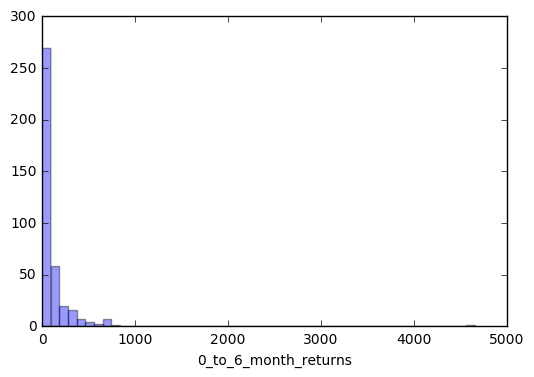

6_to_12_month_returns  ,  2015


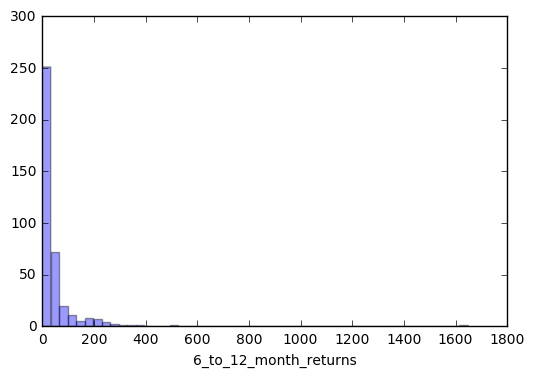

6_to_12_month_returns  ,  2016


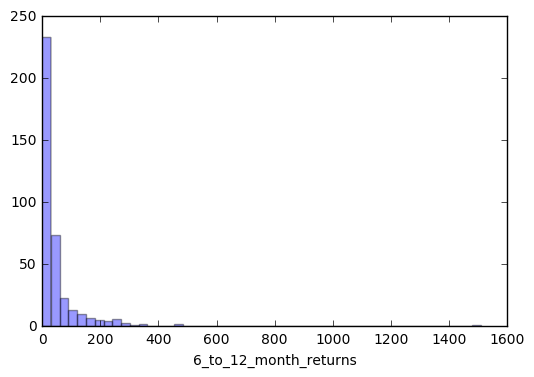

6_to_12_month_returns  ,  2017


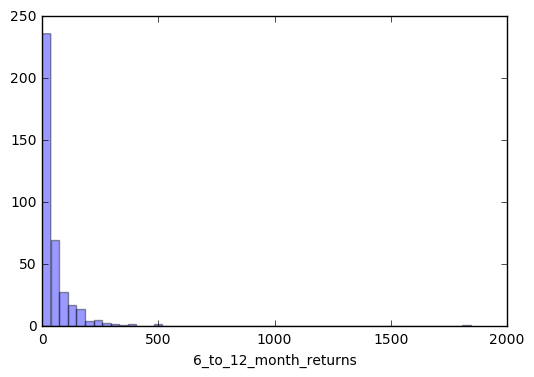

12_to_24_month_returns  ,  2015


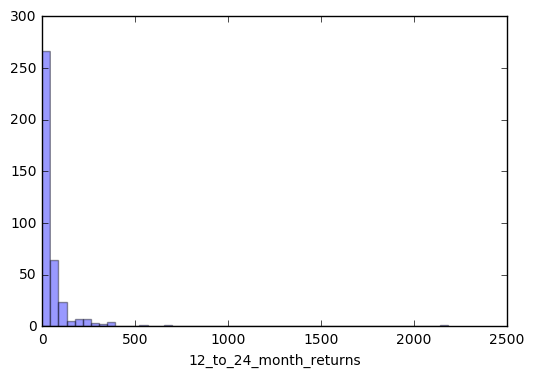

12_to_24_month_returns  ,  2016


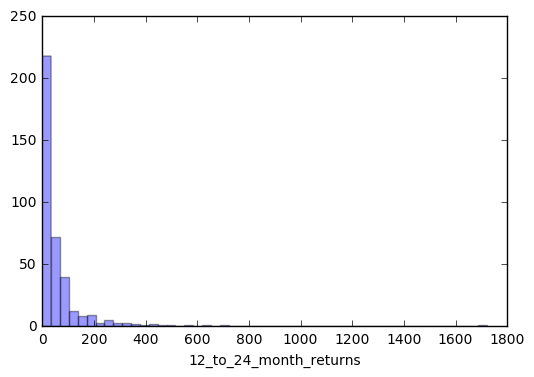

12_to_24_month_returns  ,  2017


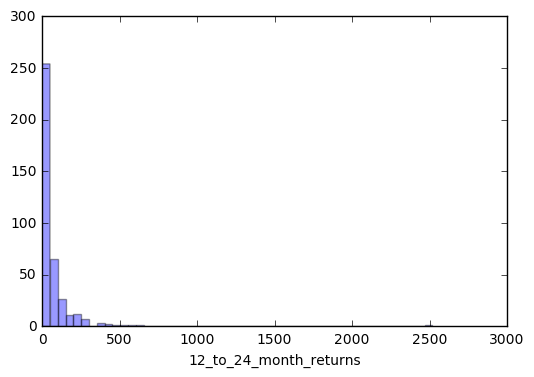

doe_total_rate  ,  2015


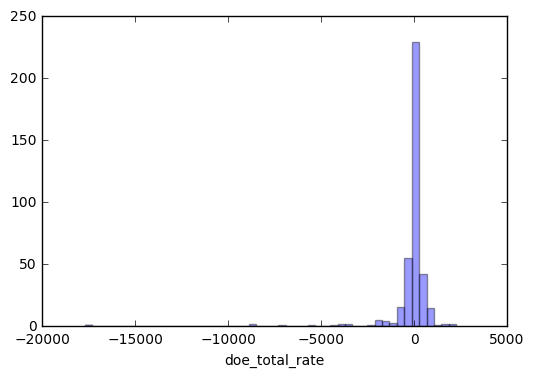

doe_total_rate  ,  2016


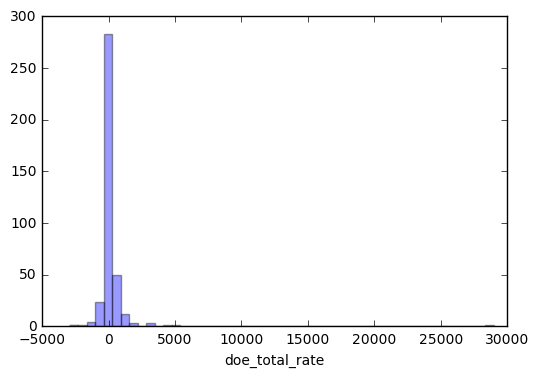

doe_total_rate  ,  2017


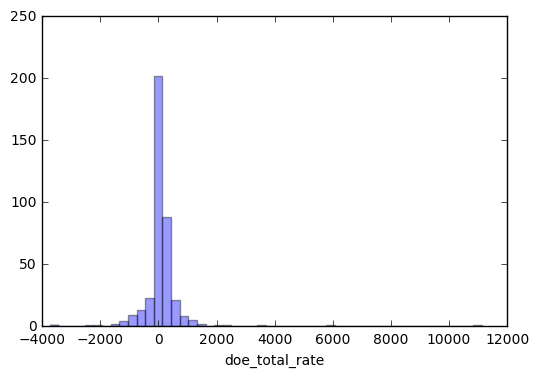

doe_unsheltered_rate  ,  2015


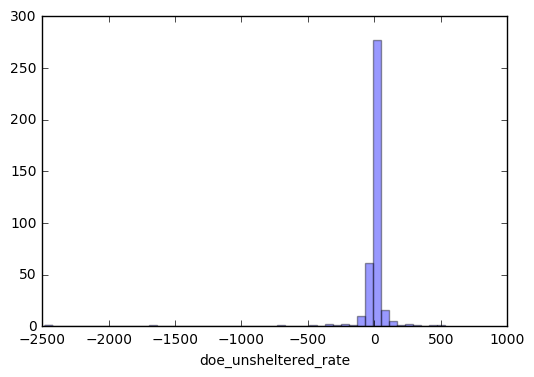

doe_unsheltered_rate  ,  2016


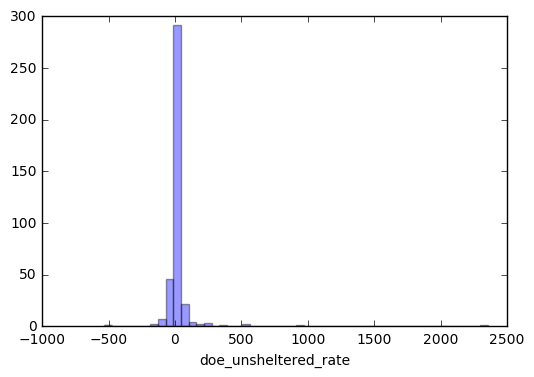

doe_unsheltered_rate  ,  2017


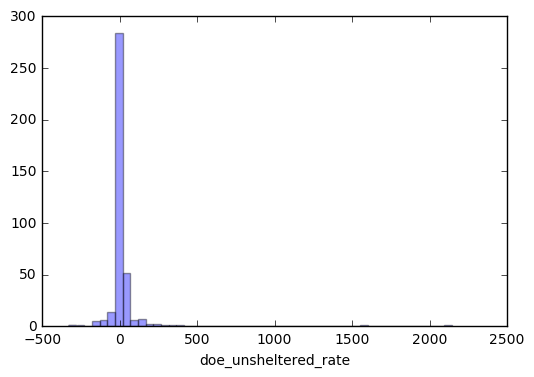

doe_sheltered_rate  ,  2015


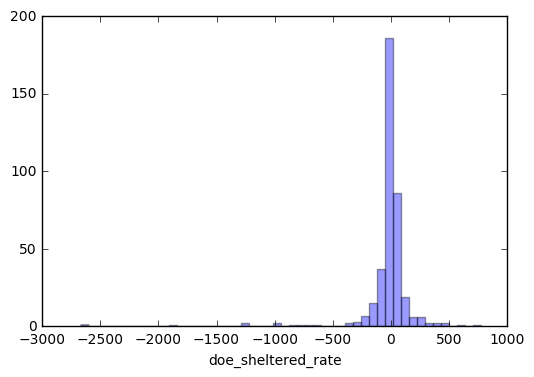

doe_sheltered_rate  ,  2016


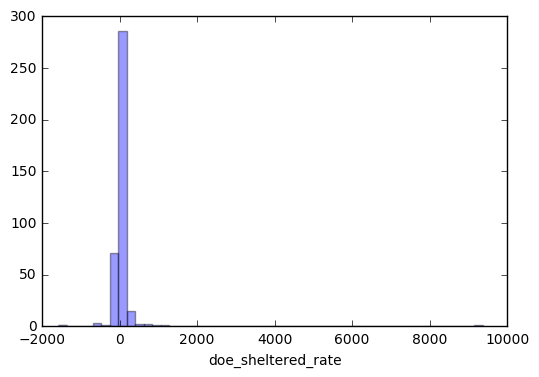

doe_sheltered_rate  ,  2017


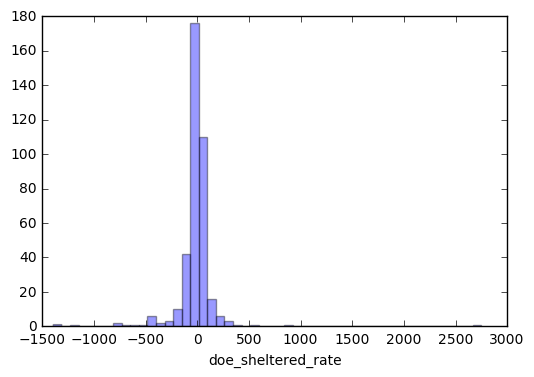

doe_hotel_motel_rate  ,  2015


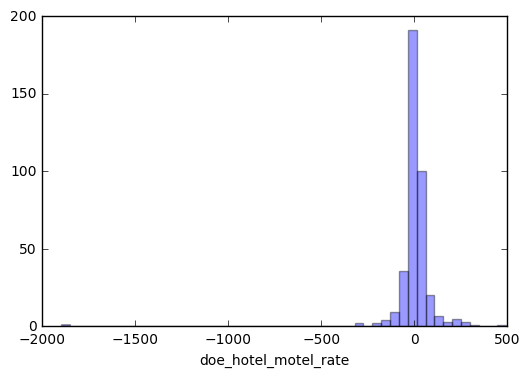

doe_hotel_motel_rate  ,  2016


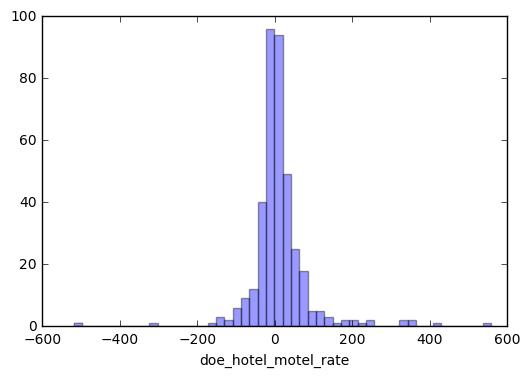

doe_hotel_motel_rate  ,  2017


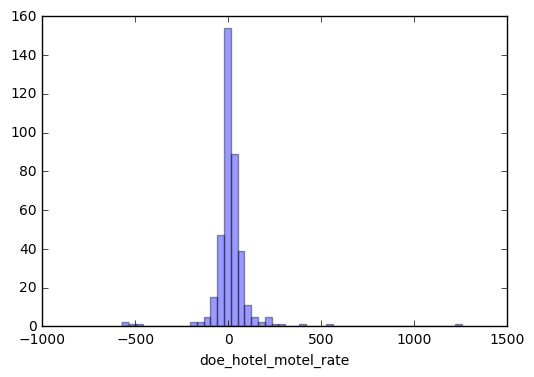

doe_doubled_up_rate  ,  2015


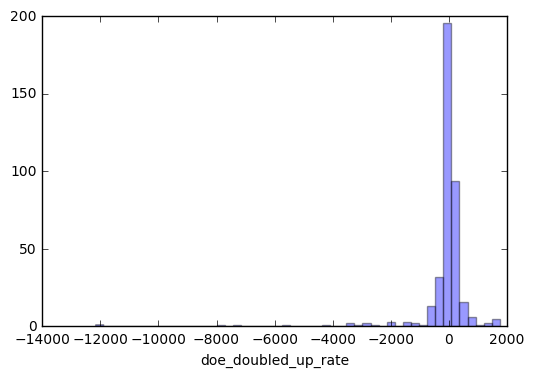

doe_doubled_up_rate  ,  2016


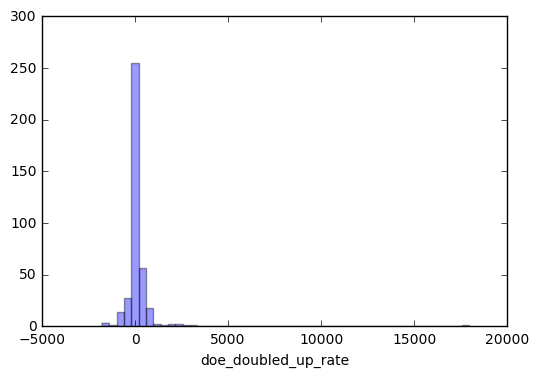

doe_doubled_up_rate  ,  2017


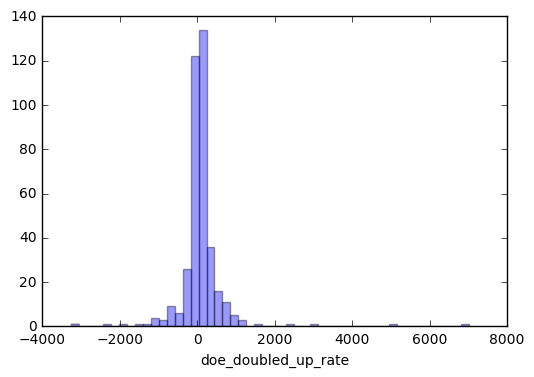

pprn  ,  2015


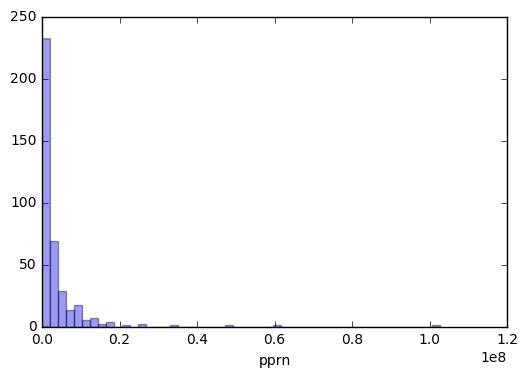

pprn  ,  2016


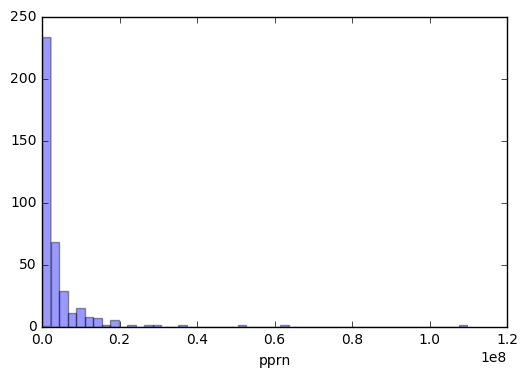

pprn  ,  2017


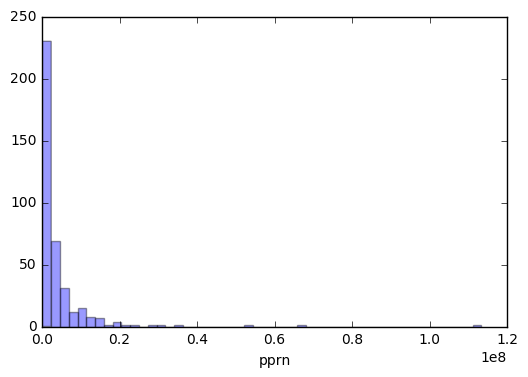

estimated_ard  ,  2015


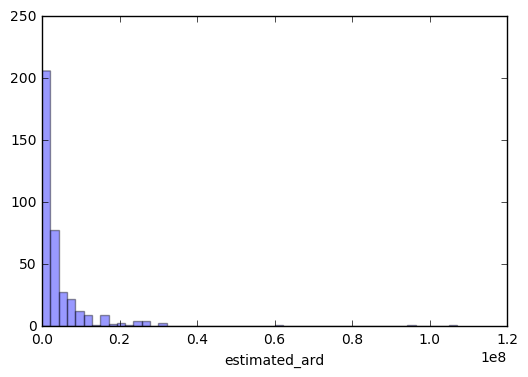

estimated_ard  ,  2016


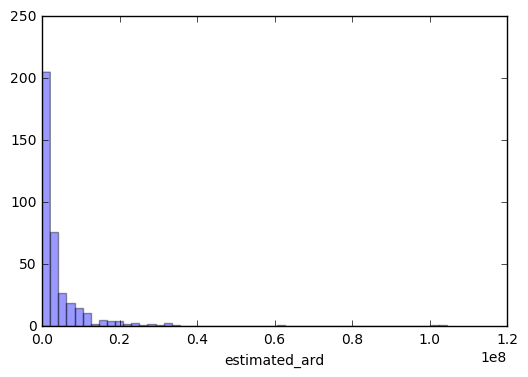

estimated_ard  ,  2017


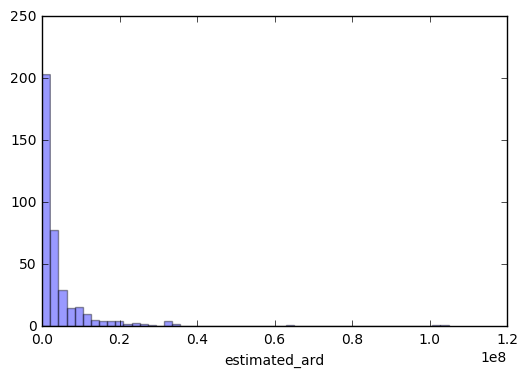

bonus  ,  2015


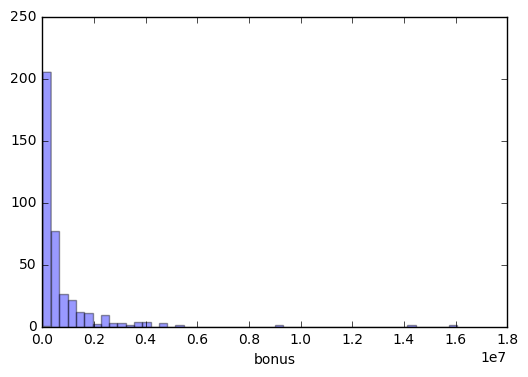

bonus  ,  2016


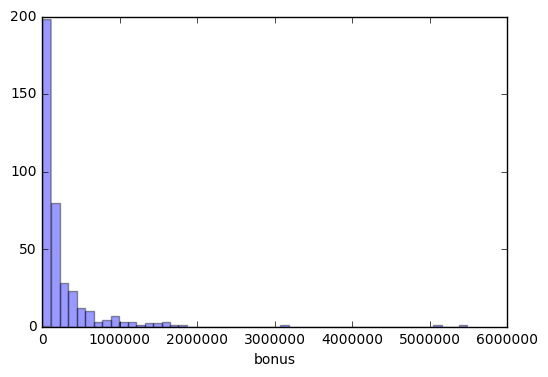

bonus  ,  2017


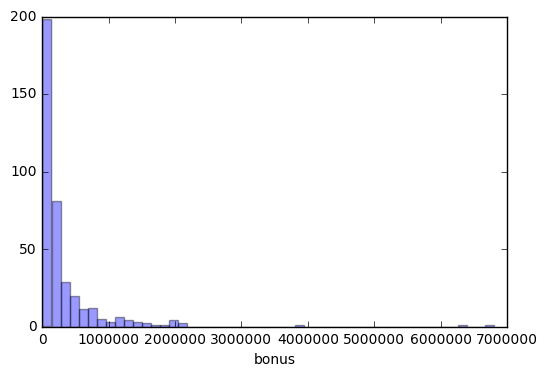

coc_planning  ,  2015


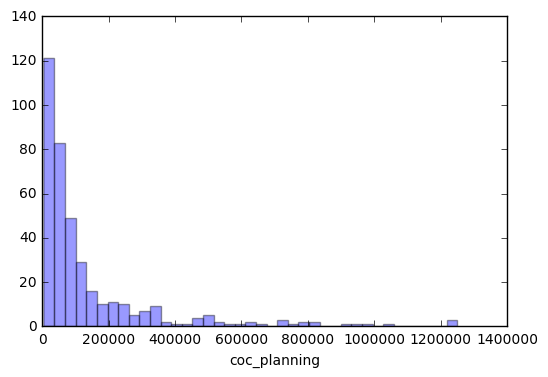

coc_planning  ,  2016


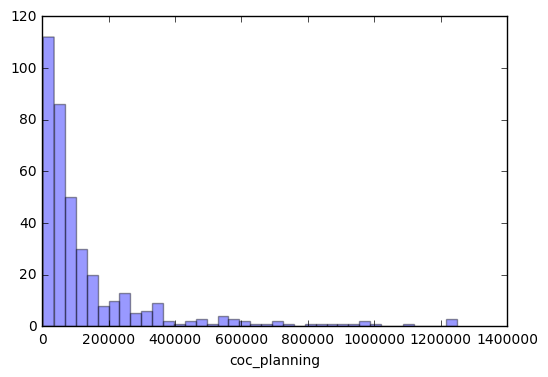

coc_planning  ,  2017


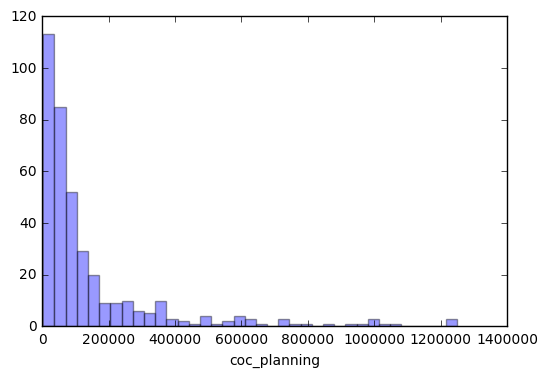

In [138]:
for col in modeling_data_space.columns[3:16]:
    for yr in modeling_data_space['year'].unique():
        print(col, ' , ', yr)
        sns.distplot(modeling_data_space[modeling_data_space['year'] == yr][col], kde = False)
        plt.show()

At the national level the recidivism metrics are highly skewed left, the ard amounts slightly less skewed left due to high outliers and doe rates seem to be zero-centered with noise. With regional features to consider, normalizations and transformations are needed to extract more informative visualizations.

In [139]:
modeling_data_space.drop(columns = 'year').corr()

,total_returns,0_to_6_month_returns,6_to_12_month_returns,12_to_24_month_returns,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,doe_hotel_motel_rate,doe_doubled_up_rate,pprn,estimated_ard,bonus,coc_planning,Major Cities,Other Urban CoCs,Rural CoCs,Suburban CoCs
total_returns,1.000000,0.936571,0.964321,0.959831,0.256829,0.036679,0.188732,0.081129,0.271806,0.831239,0.768814,0.650730,0.644983,0.384041,-0.099154,-0.047394,-0.138459
0_to_6_month_returns,0.936571,1.000000,0.961982,0.938975,0.290100,0.001180,0.271961,0.048783,0.298011,0.798477,0.707943,0.613247,0.551731,0.336198,-0.061481,-0.071404,-0.112683
6_to_12_month_returns,0.964321,0.961982,1.000000,0.979231,0.255224,0.006791,0.218344,0.072789,0.264392,0.804586,0.741460,0.638828,0.616747,0.391134,-0.077538,-0.078233,-0.131087
12_to_24_month_returns,0.959831,0.938975,0.979231,1.000000,0.213895,-0.027953,0.172342,0.060870,0.228143,0.799886,0.739405,0.636645,0.602136,0.386876,-0.084222,-0.080545,-0.121364
doe_total_rate,0.256829,0.290100,0.255224,0.213895,1.000000,0.683270,0.754602,0.487092,0.969006,0.217746,0.162241,-0.105716,0.082405,0.034112,-0.019888,0.016642,-0.023002
doe_unsheltered_rate,0.036679,0.001180,0.006791,-0.027953,0.683270,1.000000,0.468534,0.415899,0.598021,0.067831,0.076727,-0.201512,0.063973,0.080820,-0.011244,-0.018795,-0.028186
doe_sheltered_rate,0.188732,0.271961,0.218344,0.172342,0.754602,0.468534,1.000000,0.163190,0.618426,0.221151,0.177029,0.008687,0.078310,-0.000224,-0.003746,-0.011051,0.012789
doe_hotel_motel_rate,0.081129,0.048783,0.072789,0.060870,0.487092,0.415899,0.163190,1.000000,0.458170,0.082166,0.067559,-0.098246,0.079783,0.038022,-0.020359,0.009978,-0.019248
doe_doubled_up_rate,0.271806,0.298011,0.264392,0.228143,0.969006,0.598021,0.618426,0.458170,1.000000,0.200134,0.142361,-0.106875,0.065169,0.031409,-0.019143,0.022028,-0.026600
pprn,0.831239,0.798477,0.804586,0.799886,0.217746,0.067831,0.221151,0.082166,0.200134,1.000000,0.914198,0.810854,0.807967,0.428283,-0.111239,-0.098690,-0.112755


At the national level recidivism metrics are not strongly correlated with doe rates or most coc categories. They are slightly more positively correlated with major city coc's and even more positively strongly correlated with Ard's. Doe rates on the other hand are very weakly correlated with ard's. Moreover doe rates are extremely weakly correlated with coc categories. Ard's are moderately positively correlated with major city cocs and very weakly correlated with othe coc categories.

We may conclude that at the national level major city cocs correlate most strongly with ard estimates / rewards and recidivism metrics while doe rates have little correlation with the other features. This suggests the following possibilities:
    - Funding coc's in major cities drives recidivism (very unlikely)
    - HUD is taking a brute-force approach to tackling homelessness rather than considering regional needs and needs of 
      students and other marginalized sub-populations (more likely)

These descriptive statistics below may be useful for backing up observations in the plots and tables above as well as reference for future p-tests and further analysis.

In [140]:
from IPython.display import display

stats_by_year = modeling_data_space.groupby('year').describe()
for col in modeling_data_space.drop(columns = 'coc_category').columns[3:]:
    print(col)
    display(stats_by_year[col].drop(columns = 'count'))

total_returns


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,925.644156,1730.616929,0.0,200.00,456.0,1075.00,25748.0
2016,1043.208333,1797.570131,0.0,261.75,560.0,1206.25,25879.0
2017,1177.298701,2380.905473,0.0,300.00,616.0,1354.00,39595.0


0_to_6_month_returns


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,88.859740,245.207928,0.0,9.00,29.0,83.00,4154.0
2016,97.502604,246.230591,0.0,12.75,37.0,95.75,4156.0
2017,107.841558,269.957189,0.0,14.00,47.0,112.00,4650.0


6_to_12_month_returns


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,44.470130,103.309858,0.0,6.0,17.0,45.0,1648.0
2016,49.916667,101.824086,0.0,8.0,21.0,48.0,1509.0
2017,54.953247,115.827898,0.0,9.0,24.0,60.0,1843.0


12_to_24_month_returns


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,52.974026,133.277746,0.0,7.0,21.0,54.00,2180.0
2016,63.231771,126.038644,0.0,9.0,26.0,67.25,1720.0
2017,67.067532,152.854457,0.0,11.0,29.0,71.00,2517.0


doe_total_rate


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,-177.215584,1343.387902,-17681.0,-126.00,11.0,149.0,2260.0
2016,193.223958,1593.713637,-2906.0,-73.75,38.5,199.5,28981.0
2017,102.316883,818.989356,-3719.0,-49.00,50.0,208.0,11117.0


doe_unsheltered_rate


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,-11.444156,170.875877,-2480.0,-8.0,0.0,8.0,531.0
2016,16.817708,143.322121,-531.0,-5.0,0.0,12.0,2353.0
2017,16.623377,145.986411,-328.0,-5.0,1.0,14.0,2145.0


doe_sheltered_rate


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,-23.989610,240.356647,-2667.0,-35.0,0.0,35.0,777.0
2016,35.513021,502.740110,-1572.0,-28.0,6.0,41.0,9375.0
2017,-14.358442,216.177412,-1393.0,-41.0,-3.0,30.0,2749.0


doe_hotel_motel_rate


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,3.909091,119.075714,-1896.0,-16.00,2.0,27.00,491.0
2016,11.500000,77.698050,-517.0,-16.25,2.0,28.25,558.0
2017,12.805195,107.292052,-570.0,-12.00,7.0,32.00,1256.0


doe_doubled_up_rate


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,-132.537662,1047.102602,-12160.0,-97.0,15.0,114.00,1748.0
2016,119.807292,1021.641662,-1784.0,-64.0,33.0,149.25,17946.0
2017,84.361039,625.204193,-3249.0,-46.0,46.0,178.00,7015.0


pprn


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,3.606931e+06,7.563717e+06,60179.0,685691.00,1577428.0,3559703.00,102700493.0
2016,3.863029e+06,8.087167e+06,65096.0,727782.75,1694542.0,3804795.25,109711721.0
2017,4.017275e+06,8.354842e+06,64104.0,748691.00,1748172.0,3905501.00,113335025.0


estimated_ard


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,4.676044e+06,9.429960e+06,0.0,759439.00,1924873.0,4423358.0,107080256.0
2016,4.801788e+06,9.745645e+06,0.0,735986.75,1883160.0,4539016.5,104502264.0
2017,4.901843e+06,9.896182e+06,0.0,736174.00,1841471.0,4609993.0,104865915.0


bonus


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,749941.587013,1.432579e+06,25752.0,137029.0,321107.0,727354.0,16062038.0
2016,259335.130208,5.009679e+05,5151.0,48184.0,104498.5,247786.5,5485586.0
2017,320266.075325,6.198752e+05,6329.0,59101.0,134008.0,306328.0,6800102.0


coc_planning


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,139304.511688,202472.036099,5150.0,27406.0,64221.0,145471.00,1250000.0
2016,143948.302083,210221.017020,3091.0,28910.0,62699.0,148671.75,1250000.0
2017,147904.787013,215980.129041,3164.0,29550.0,67004.0,153164.00,1250000.0


Major Cities


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,0.122078,0.327802,0.0,0.0,0.0,0.0,1.0
2016,0.122396,0.328170,0.0,0.0,0.0,0.0,1.0
2017,0.122078,0.327802,0.0,0.0,0.0,0.0,1.0


Other Urban CoCs


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,0.153247,0.360694,0.0,0.0,0.0,0.0,1.0
2016,0.153646,0.361079,0.0,0.0,0.0,0.0,1.0
2017,0.153247,0.360694,0.0,0.0,0.0,0.0,1.0


Rural CoCs


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,0.275325,0.447259,0.0,0.0,0.0,1.0,1.0
2016,0.276042,0.447621,0.0,0.0,0.0,1.0,1.0
2017,0.275325,0.447259,0.0,0.0,0.0,1.0,1.0


Suburban CoCs


,mean,std,min,25%,50%,75%,max
year,,,,,,,
2015,0.449351,0.498075,0.0,0.0,0.0,1.0,1.0
2016,0.447917,0.497929,0.0,0.0,0.0,1.0,1.0
2017,0.449351,0.498075,0.0,0.0,0.0,1.0,1.0


In [141]:
stats_by_state = modeling_data_space.groupby('state').describe()
for col in modeling_data_space.drop(columns = 'coc_category').columns[3:]:
    print(col)
    display(stats_by_state[col].drop(columns = 'count').sort_values(by = ['std'], ascending = False))

total_returns


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NY,1882.560000,6050.035920,0.0,112.00,479.0,1084.50,39595.0
OH,3168.666667,3108.412865,239.0,925.00,1950.0,4422.50,10919.0
WA,3007.166667,2014.778144,767.0,1723.25,2334.5,3899.75,7303.0
WI,1922.833333,1872.086480,192.0,791.75,1229.0,2434.75,6051.0
IN,2878.166667,1764.300362,1078.0,1371.25,2637.0,4396.25,4985.0
CT,2477.500000,1753.167277,772.0,898.25,2375.0,4097.75,4265.0
AZ,2906.222222,1651.483180,1083.0,1787.00,2442.0,3594.00,5657.0
CA,977.861789,1607.651109,0.0,160.00,398.0,991.00,10120.0
GA,1301.148148,1523.139968,0.0,332.00,618.0,1130.50,4264.0


0_to_6_month_returns


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NY,224.680000,846.916572,0.0,2.50,21.0,67.50,4650.0
OH,309.037037,274.519087,11.0,79.50,209.0,532.00,824.0
MI,137.523810,217.917627,0.0,28.50,67.0,141.00,1257.0
WI,207.000000,195.569564,17.0,54.75,159.5,314.50,669.0
CT,257.000000,195.030254,67.0,83.75,250.0,421.50,468.0
CO,182.555556,192.871143,28.0,78.00,124.0,218.00,660.0
UT,182.888889,188.391510,12.0,44.00,116.0,233.00,524.0
NV,219.000000,186.983288,8.0,26.00,236.0,359.00,471.0
AZ,313.333333,180.697261,118.0,133.00,307.0,394.00,618.0


6_to_12_month_returns


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NY,100.933333,326.442923,0.0,4.00,17.0,53.00,1843.0
OH,182.555556,173.705395,7.0,40.00,102.0,264.50,496.0
AZ,162.666667,113.350121,41.0,60.00,160.0,182.00,371.0
CT,141.666667,105.723539,35.0,46.50,142.5,237.00,247.0
WI,109.416667,103.097887,8.0,29.75,88.0,151.50,330.0
UT,94.777778,97.721259,8.0,16.00,44.0,177.00,268.0
IN,138.333333,90.074784,49.0,69.50,110.5,213.00,257.0
OR,50.571429,82.891237,0.0,12.00,22.0,40.00,353.0
CA,44.056911,76.169064,0.0,5.50,18.0,43.50,384.0


12_to_24_month_returns


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NY,126.586667,422.638274,0.0,5.00,21.0,77.00,2517.0
OH,243.962963,233.121870,11.0,56.50,153.0,377.00,691.0
UT,135.111111,152.740339,12.0,37.00,100.0,178.00,496.0
AZ,189.222222,142.415570,60.0,85.00,178.0,189.00,431.0
WI,132.166667,130.914846,5.0,50.25,92.5,168.00,421.0
NE,105.777778,124.042108,33.0,44.00,49.0,110.00,414.0
OR,68.428571,117.578302,0.0,20.00,26.0,39.00,488.0
CT,159.666667,113.806268,35.0,67.25,161.0,254.75,279.0
CA,58.243902,104.574026,0.0,7.00,21.0,54.00,575.0


doe_total_rate


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NY,421.453333,3476.553063,-7050.0,-22.50,18.0,115.00,28981.0
CA,-333.544715,2513.703558,-17681.0,-454.00,46.0,323.00,11117.0
NV,216.111111,1892.842535,-3719.0,-55.00,166.0,239.00,3358.0
DC,952.333333,1804.616949,-201.0,-87.50,26.0,1529.00,3032.0
LA,276.476190,1374.991950,-1000.0,-173.00,-16.0,261.00,6059.0
NM,-41.666667,1181.484434,-1958.0,-453.00,86.5,472.25,1567.0
AZ,-325.222222,1085.622952,-2906.0,-240.00,-145.0,174.00,647.0
TX,131.818182,1047.015534,-2324.0,-83.00,53.0,572.00,3036.0
HI,108.000000,872.522779,-832.0,-284.00,264.0,578.00,892.0


doe_unsheltered_rate


,mean,std,min,25%,50%,75%,max
state,,,,,,,
KY,231.333333,534.131070,-143.0,7.00,16.0,74.00,1573.0
NY,-4.506667,400.757168,-2480.0,0.00,0.0,2.50,2353.0
ND,-195.666667,317.364669,-531.0,-343.50,-156.0,-28.00,100.0
CA,4.910569,278.953108,-1697.0,-11.00,5.0,23.50,2145.0
NM,138.833333,215.548989,-7.0,3.00,27.5,201.25,531.0
PR,93.666667,204.196800,-124.0,0.00,124.0,202.50,281.0
TX,56.909091,151.292011,-172.0,1.00,6.0,49.00,524.0
HI,0.000000,137.829605,-132.0,-71.50,-11.0,66.00,143.0
NV,53.777778,107.878146,-36.0,-9.00,27.0,34.00,319.0


doe_sheltered_rate


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NY,105.280000,1104.633846,-1393.0,-19.50,5.0,29.00,9375.0
DC,417.666667,790.479180,-457.0,86.00,629.0,855.00,1081.0
LA,144.476190,600.450799,-120.0,-10.00,17.0,62.00,2749.0
AZ,-228.333333,597.701640,-1572.0,-232.00,-27.0,122.00,389.0
KY,-401.888889,573.271629,-1244.0,-1006.00,-178.0,3.00,215.0
TX,-103.090909,544.985628,-2667.0,-66.00,-16.0,19.00,777.0
HI,-20.333333,336.705113,-404.0,-143.50,117.0,171.50,226.0
CO,-120.222222,281.165333,-809.0,-128.00,-99.0,70.00,120.0
CA,-24.764228,267.703809,-1901.0,-48.00,-5.0,32.50,916.0


doe_hotel_motel_rate


,mean,std,min,25%,50%,75%,max
state,,,,,,,
CA,16.764228,225.521548,-1896.0,-14.00,11.0,37.00,1256.0
NV,11.333333,216.849602,-528.0,36.00,43.0,79.00,266.0
CO,-68.888889,201.577184,-539.0,-118.00,25.0,63.00,75.0
TX,65.242424,172.090825,-493.0,-12.00,25.0,132.00,421.0
GA,53.518519,122.154496,-101.0,-2.50,19.0,48.00,491.0
MA,-49.044444,122.066665,-570.0,-73.00,-18.0,3.00,115.0
SC,23.166667,119.992298,-185.0,-57.25,8.5,86.25,212.0
NC,48.138889,101.282957,-143.0,-4.25,21.5,49.75,414.0
IN,-21.666667,99.745008,-137.0,-109.50,-10.0,46.75,104.0


doe_doubled_up_rate


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NY,313.013333,2210.925839,-4232.0,-24.00,24.0,83.00,17946.0
CA,-323.056911,1888.477239,-12160.0,-369.50,1.0,275.00,7015.0
NV,39.666667,1577.119209,-3249.0,-159.00,9.0,156.00,2709.0
NM,-294.500000,1161.066191,-2432.0,-517.25,52.0,321.25,857.0
MS,188.222222,906.156965,-1374.0,-233.00,283.0,644.00,1748.0
TX,85.818182,904.370100,-2268.0,-151.00,52.0,320.00,2199.0
DC,605.333333,760.132445,-246.0,300.00,846.0,1031.00,1216.0
LA,165.000000,744.824140,-865.0,-45.00,121.0,265.00,2955.0
DE,-244.000000,692.764751,-1043.0,-460.50,122.0,155.50,189.0


pprn


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NY,6.965849e+06,2.124358e+07,260595.0,559882.50,1010078.0,2744734.50,113335025.0
TX,1.032685e+07,1.153636e+07,771720.0,1099725.00,5483730.0,14588072.00,36406860.0
IL,4.250568e+06,1.127380e+07,231875.0,558595.25,1450049.5,1951793.50,54412238.0
CA,4.916203e+06,1.011499e+07,103023.0,548247.50,1576493.0,5530643.00,65917815.0
PA,5.988401e+06,7.276719e+06,1384950.0,1943763.25,2850467.5,5092569.50,29238068.0
IN,1.225341e+07,6.857107e+06,5796989.0,6176910.25,11619601.0,17609050.00,20516062.0
AZ,8.847266e+06,6.837437e+06,2793480.0,3517453.00,5588707.0,16700039.00,18851495.0
OH,7.734600e+06,5.578375e+06,2195951.0,4494637.50,5265100.0,10133747.00,19731977.0
GA,3.757412e+06,5.050588e+06,316042.0,1185695.00,1733935.0,3504908.50,18464558.0


estimated_ard


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NY,7.557630e+06,2.039281e+07,51601.0,400380.00,1488791.0,4957450.00,107080256.0
CA,8.109747e+06,1.663161e+07,0.0,703457.50,2251625.0,8701708.50,104865915.0
IL,5.066295e+06,1.343766e+07,438717.0,868667.50,1326686.0,2491103.50,63727938.0
CT,1.978872e+07,1.162320e+07,9118835.0,9895520.00,16853039.5,30401484.75,33413421.0
WA,9.052294e+06,1.107949e+07,1220717.0,3234857.75,4789454.5,7300425.75,33724189.0
CO,9.377969e+06,1.016505e+07,2206284.0,2386264.00,2778029.0,21211885.00,23730624.0
AZ,1.254760e+07,9.796732e+06,3883471.0,4216369.00,8169802.0,24568339.00,26196615.0
TX,7.498216e+06,8.977143e+06,288891.0,772766.00,5460040.0,11091231.00,34396386.0
PA,5.978838e+06,7.994878e+06,885086.0,1616981.75,2574907.5,5760011.00,32665825.0


bonus


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NY,7.038811e+05,2.091344e+06,13035.0,56175.50,155967.0,503709.50,16062038.0
CA,7.045758e+05,1.587510e+06,5151.0,63654.00,179204.0,678981.50,14185492.0
IL,4.470094e+05,1.304427e+06,22277.0,74523.75,111866.0,232214.00,9068821.0
DC,1.792959e+06,1.206210e+06,1010368.0,1098411.50,1186455.0,2184255.00,3182055.0
TX,9.185470e+05,1.188953e+06,40548.0,115758.00,497898.0,1372302.00,5207476.0
AZ,1.101557e+06,1.165694e+06,194197.0,408490.00,632455.0,1278934.00,3929492.0
CT,1.610441e+06,1.125989e+06,494776.0,787254.50,1498874.0,1911084.50,3571584.0
WA,7.712959e+05,1.106555e+06,78345.0,194503.00,377225.0,789962.75,4652312.0
CO,8.017787e+05,1.013100e+06,119313.0,154005.00,330943.0,1186531.00,3181783.0


coc_planning


,mean,std,min,25%,50%,75%,max
state,,,,,,,
TX,323650.787879,355316.105975,23152.0,32992.00,166268.0,483666.00,1092206.0
CT,593661.833333,348696.141651,273565.0,296866.00,505591.5,912044.75,1002403.0
WA,273196.666667,331507.093646,36622.0,105060.00,144869.5,219013.25,1011726.0
CO,283981.111111,303064.425482,66189.0,71588.00,96229.0,636357.00,711919.0
AZ,376427.888889,293901.904934,116504.0,126491.00,245094.0,737050.00,785898.0
CA,205755.170732,286541.402766,3091.0,24874.00,69082.0,276547.00,1250000.0
IL,124748.633333,269804.156630,13304.0,27087.25,48450.0,74733.50,1250000.0
NY,163286.000000,265597.508501,7818.0,21205.50,46049.0,148723.50,1250000.0
PA,191442.062500,242552.282160,41549.0,58313.25,86605.0,176920.50,979975.0


Major Cities


,mean,std,min,25%,50%,75%,max
state,,,,,,,
NM,0.500000,0.547723,0.0,0.0,0.5,1.00,1.0
IN,0.500000,0.547723,0.0,0.0,0.5,1.00,1.0
TX,0.545455,0.505650,0.0,0.0,1.0,1.00,1.0
KY,0.333333,0.500000,0.0,0.0,0.0,1.00,1.0
NV,0.333333,0.500000,0.0,0.0,0.0,1.00,1.0
AZ,0.666667,0.500000,0.0,0.0,1.0,1.00,1.0
CO,0.666667,0.500000,0.0,0.0,1.0,1.00,1.0
NE,0.333333,0.500000,0.0,0.0,0.0,1.00,1.0
KS,0.250000,0.452267,0.0,0.0,0.0,0.25,1.0


Other Urban CoCs


,mean,std,min,25%,50%,75%,max
state,,,,,,,
AK,0.500000,0.547723,0.0,0.0,0.5,1.00,1.0
CT,0.500000,0.547723,0.0,0.0,0.5,1.00,1.0
ID,0.500000,0.547723,0.0,0.0,0.5,1.00,1.0
VT,0.500000,0.547723,0.0,0.0,0.5,1.00,1.0
AR,0.500000,0.522233,0.0,0.0,0.5,1.00,1.0
AL,0.571429,0.507093,0.0,0.0,1.0,1.00,1.0
MO,0.428571,0.507093,0.0,0.0,0.0,1.00,1.0
GA,0.444444,0.506370,0.0,0.0,0.0,1.00,1.0
NH,0.333333,0.500000,0.0,0.0,0.0,1.00,1.0


Rural CoCs


,mean,std,min,25%,50%,75%,max
state,,,,,,,
AK,0.500000,0.547723,0.0,0.00,0.5,1.00,1.0
VT,0.500000,0.547723,0.0,0.00,0.5,1.00,1.0
NM,0.500000,0.547723,0.0,0.00,0.5,1.00,1.0
ID,0.500000,0.547723,0.0,0.00,0.5,1.00,1.0
IN,0.500000,0.547723,0.0,0.00,0.5,1.00,1.0
AR,0.500000,0.522233,0.0,0.00,0.5,1.00,1.0
LA,0.428571,0.507093,0.0,0.00,0.0,1.00,1.0
NY,0.480000,0.502964,0.0,0.00,0.0,1.00,1.0
AZ,0.333333,0.500000,0.0,0.00,0.0,1.00,1.0


Suburban CoCs


,mean,std,min,25%,50%,75%,max
state,,,,,,,
CT,0.500000,0.547723,0.0,0.00,0.5,1.00,1.0
WA,0.500000,0.514496,0.0,0.00,0.5,1.00,1.0
OR,0.428571,0.507093,0.0,0.00,0.0,1.00,1.0
OH,0.555556,0.506370,0.0,0.00,1.0,1.00,1.0
MI,0.523810,0.503444,0.0,0.00,1.0,1.00,1.0
NY,0.480000,0.502964,0.0,0.00,0.0,1.00,1.0
IL,0.550000,0.501692,0.0,0.00,1.0,1.00,1.0
VA,0.437500,0.501328,0.0,0.00,0.0,1.00,1.0
NH,0.333333,0.500000,0.0,0.00,0.0,1.00,1.0


In [142]:
stats_by_coc_cat = modeling_data_space.drop(columns = 'year').groupby('coc_category').describe()
for col in modeling_data_space.drop(columns = 'coc_category').columns[3:]:
    print(col)
    display(stats_by_coc_cat[col].sort_values(by = ['std'], ascending = False))

total_returns


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,3098.673759,4516.968406,133.0,1294.00,1903.0,3681.00,39595.0
Rural CoCs,318.0,895.688679,1494.495376,0.0,169.50,376.5,842.50,10919.0
Suburban CoCs,518.0,743.191120,742.554684,0.0,258.25,507.0,941.75,4495.0
Other Urban CoCs,177.0,584.802260,481.034515,0.0,221.00,469.0,800.00,2733.0


0_to_6_month_returns


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,326.822695,628.943562,4.0,83.0,181.0,344.00,4650.0
Rural CoCs,318.0,68.679245,122.094927,0.0,7.0,21.5,70.25,824.0
Suburban CoCs,518.0,66.372587,97.593630,0.0,11.0,31.0,79.75,717.0
Other Urban CoCs,177.0,61.401130,72.425609,0.0,12.0,38.0,81.00,528.0


6_to_12_month_returns


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,162.085106,247.894721,3.0,50.0,99.0,198.0,1843.0
Rural CoCs,318.0,36.191824,64.510222,0.0,4.0,13.0,37.0,488.0
Suburban CoCs,518.0,34.220077,46.115088,0.0,8.0,19.0,40.0,268.0
Other Urban CoCs,177.0,30.265537,32.903485,0.0,8.0,19.0,40.0,177.0


12_to_24_month_returns


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,204.000000,324.039592,3.0,61.00,107.0,240.00,2517.0
Rural CoCs,318.0,43.091195,79.756577,0.0,4.25,15.0,44.75,624.0
Suburban CoCs,518.0,42.555985,57.384951,0.0,10.00,23.0,52.00,496.0
Other Urban CoCs,177.0,33.819209,34.260053,0.0,8.00,21.0,47.00,149.0


doe_total_rate


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,158.226950,3319.355115,-17681.0,-450.00,99.0,665.00,28981.0
Suburban CoCs,518.0,6.160232,766.530680,-8749.0,-52.75,38.0,166.50,6059.0
Other Urban CoCs,177.0,-21.463277,465.636283,-3973.0,-107.00,20.0,130.00,1177.0
Rural CoCs,318.0,74.402516,449.165060,-2324.0,-61.50,27.0,165.75,3036.0


doe_unsheltered_rate


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,40.744681,413.159921,-2480.0,-9.0,8.0,49.00,2353.0
Rural CoCs,318.0,2.622642,76.151325,-531.0,-8.0,0.0,11.75,512.0
Suburban CoCs,518.0,2.505792,49.900200,-684.0,-4.0,0.0,8.00,281.0
Other Urban CoCs,177.0,3.248588,38.700706,-126.0,-5.0,1.0,11.00,319.0


doe_sheltered_rate


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,-1.184397,916.489394,-2667.0,-128.00,-1.0,87.00,9375.0
Suburban CoCs,518.0,3.918919,153.782399,-741.0,-28.00,1.0,33.75,2749.0
Rural CoCs,318.0,-7.166667,141.360784,-1244.0,-32.75,0.0,30.00,662.0
Other Urban CoCs,177.0,-4.016949,93.397092,-666.0,-27.00,2.0,29.00,371.0


doe_hotel_motel_rate


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,19.879433,243.900550,-1896.0,-30.00,18.0,75.0,1256.0
Rural CoCs,318.0,11.066038,73.212831,-493.0,-12.00,3.0,22.0,491.0
Suburban CoCs,518.0,7.210425,58.981590,-517.0,-14.75,3.0,27.0,271.0
Other Urban CoCs,177.0,4.485876,44.341278,-303.0,-14.00,3.0,27.0,130.0


doe_doubled_up_rate


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,101.581560,2213.910410,-12160.0,-395.00,71.0,512.00,17946.0
Suburban CoCs,518.0,-3.440154,650.641706,-7793.0,-47.25,31.5,138.75,3304.0
Other Urban CoCs,177.0,-17.762712,413.246089,-3487.0,-62.00,24.0,117.00,1183.0
Rural CoCs,318.0,56.795597,390.089983,-2268.0,-62.25,33.0,134.50,2199.0


pprn


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,1.301266e+07,1.835155e+07,1185108.0,4615782.00,8074319.0,11952143.00,113335025.0
Rural CoCs,318.0,2.548933e+06,4.627928e+06,60179.0,526320.75,986012.0,2464565.25,36406860.0
Suburban CoCs,518.0,2.829538e+06,3.305284e+06,150750.0,749565.25,1764300.5,3435752.75,19731977.0
Other Urban CoCs,177.0,1.738287e+06,1.790873e+06,179942.0,766396.00,1262648.0,1820196.00,12143827.0


estimated_ard


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,1.821835e+07,2.139970e+07,1363211.0,4925972.00,11231625.0,23730624.00,107080256.0
Suburban CoCs,518.0,3.619155e+06,4.561884e+06,0.0,833047.75,1945434.0,4394960.00,33413421.0
Rural CoCs,318.0,2.155348e+06,3.105717e+06,0.0,374236.75,849045.0,2561173.25,16929821.0
Other Urban CoCs,177.0,2.273800e+06,2.060558e+06,216199.0,843450.00,1726468.0,3120718.00,11051238.0


bonus


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,1.584712e+06,2.214210e+06,68161.0,406676.00,950491.0,1672674.00,16062038.0
Suburban CoCs,518.0,3.360151e+05,4.640210e+05,10631.0,84897.00,179331.5,393017.25,3802950.0
Rural CoCs,318.0,2.433156e+05,4.624703e+05,5151.0,43626.25,97943.5,230689.25,5207476.0
Other Urban CoCs,177.0,2.075713e+05,2.268787e+05,18245.0,73303.00,135853.0,257198.00,1684460.0


coc_planning


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,460891.432624,348350.955877,40896.0,165858.00,345505.0,711919.00,1250000.0
Rural CoCs,318.0,84981.783019,140953.493775,3091.0,19344.75,34997.0,90802.00,1092206.0
Suburban CoCs,518.0,117799.523166,139551.604804,5150.0,38422.50,66879.0,138858.25,1002403.0
Other Urban CoCs,177.0,72438.847458,63546.181405,10756.0,29609.00,55031.0,94546.00,364315.0


Major Cities


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Other Urban CoCs,177.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rural CoCs,318.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suburban CoCs,518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Other Urban CoCs


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Urban CoCs,177.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Rural CoCs,318.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suburban CoCs,518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Rural CoCs


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Urban CoCs,177.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rural CoCs,318.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0
Suburban CoCs,518.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


Suburban CoCs


,count,mean,std,min,25%,50%,75%,max
coc_category,,,,,,,,
Major Cities,141.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Other Urban CoCs,177.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Rural CoCs,318.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Suburban CoCs,518.0,1.0,0.0,1.0,1.0,1.0,1.0,1.0


# Normalizing Model Space

In [158]:
# Normalize by coc population
coc_census_population = pd.read_csv('coc_census_population.csv').rename(columns = {'coc_number': 'cocnumber'})
normalized_modeling_data_space = pd.merge(modeling_data_space, coc_census_population).drop(columns = 'cen_population_density')
people_counts = normalized_modeling_data_space.columns[3:12]
for count in people_counts:
    normalized_modeling_data_space[count] = normalized_modeling_data_space[count] / normalized_modeling_data_space['cen_population_estimate']
normalized_modeling_data_space = normalized_modeling_data_space.drop(columns = 'cen_population_estimate')
normalized_modeling_data_space.head()

,year,state,cocnumber,total_returns,0_to_6_month_returns,6_to_12_month_returns,12_to_24_month_returns,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,...,doe_doubled_up_rate,pprn,estimated_ard,bonus,coc_planning,coc_category,Major Cities,Other Urban CoCs,Rural CoCs,Suburban CoCs
0,2015,AZ,AZ-500,0.000657,0.000081,0.000027,0.000036,0.000042,-0.000013,-0.000016,...,0.000101,2793480,4216369,632455,126491,Rural CoCs,0,0,1,0
1,2016,AZ,AZ-500,0.000711,0.000071,0.000025,0.000036,0.000377,0.000040,0.000108,...,0.000144,3340318,3883936,194197,116518,Rural CoCs,0,0,1,0
2,2017,AZ,AZ-500,0.001056,0.000070,0.000035,0.000059,0.000103,0.000026,-0.000002,...,0.000118,3517453,3883471,233008,116504,Rural CoCs,0,0,1,0
3,2015,AZ,AZ-501,0.002293,0.000309,0.000165,0.000084,-0.000164,-0.000008,0.000121,...,-0.000212,5124218,8526226,1278934,255787,Major Cities,1,0,0,0
4,2016,AZ,AZ-501,0.002756,0.000302,0.000157,0.000181,-0.000973,0.000024,-0.000146,...,-0.000853,5588707,8169802,408490,245094,Major Cities,1,0,0,0


total_returns  ,  2015


C:\Users\James\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: UserWarning: Boolean Series key will be reindexed to match DataFrame index.


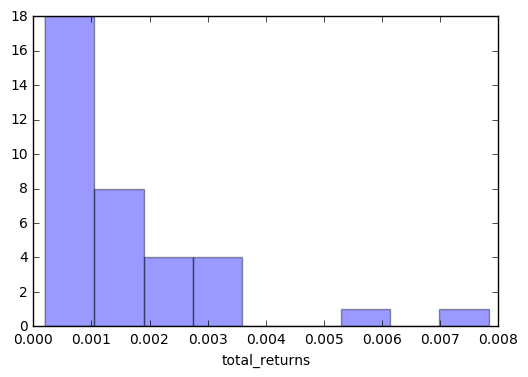

total_returns  ,  2016


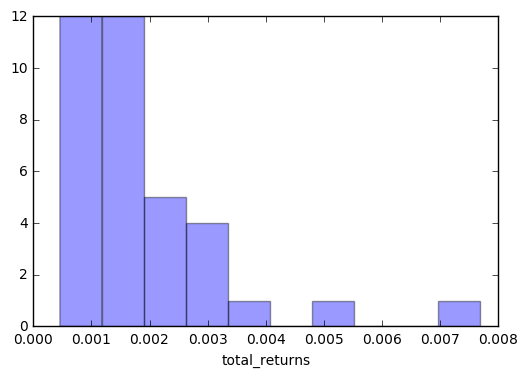

total_returns  ,  2017


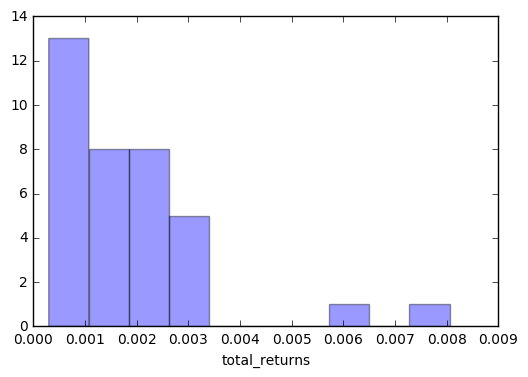

0_to_6_month_returns  ,  2015


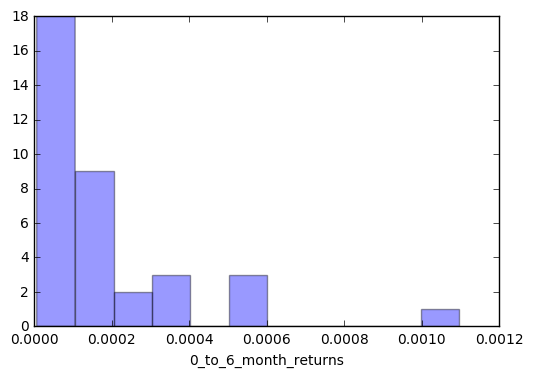

0_to_6_month_returns  ,  2016


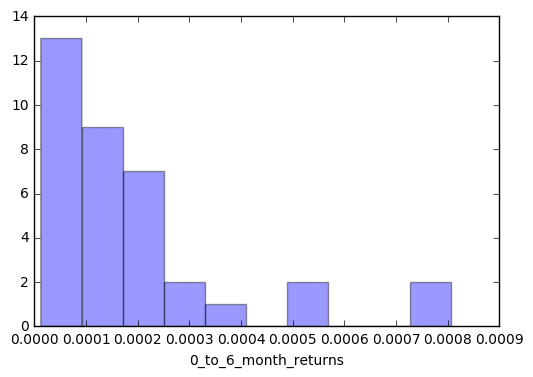

0_to_6_month_returns  ,  2017


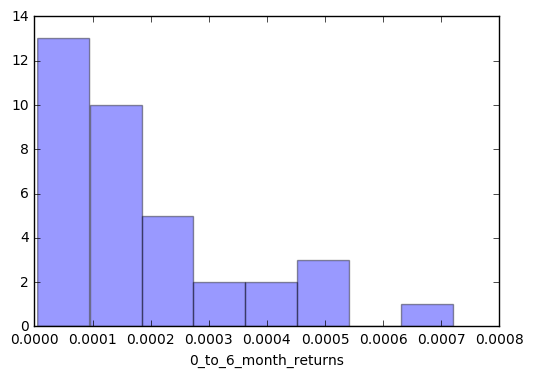

6_to_12_month_returns  ,  2015


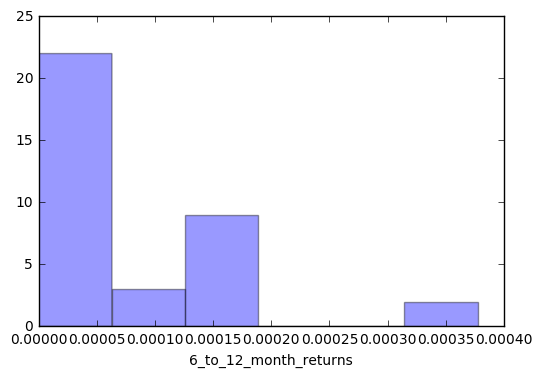

6_to_12_month_returns  ,  2016


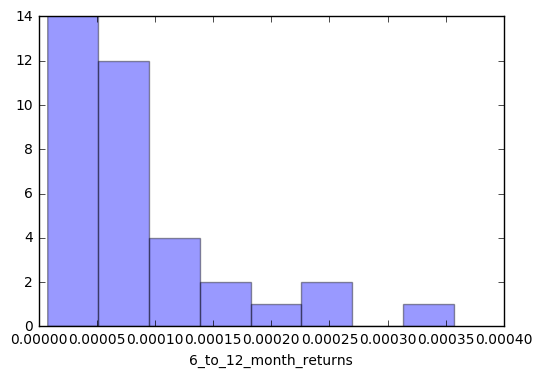

6_to_12_month_returns  ,  2017


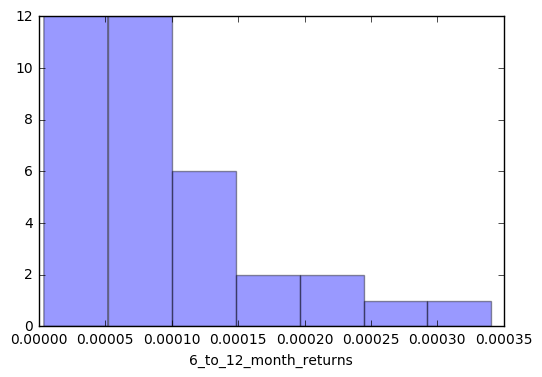

12_to_24_month_returns  ,  2015


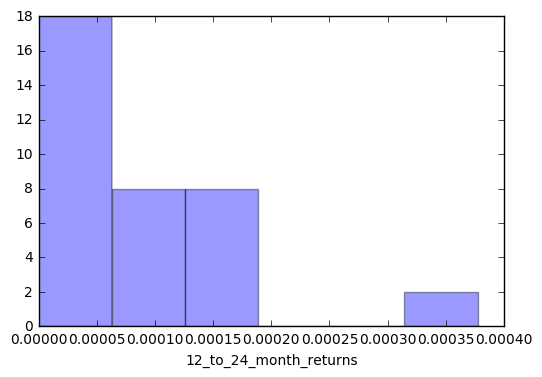

12_to_24_month_returns  ,  2016


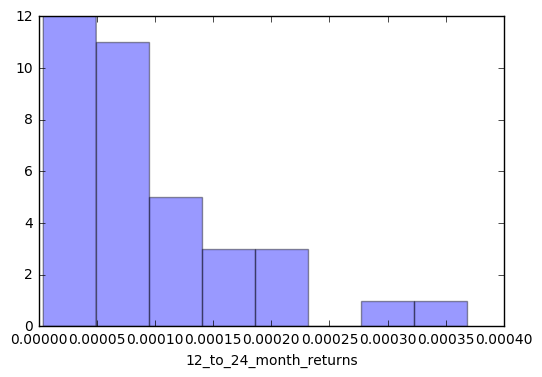

12_to_24_month_returns  ,  2017


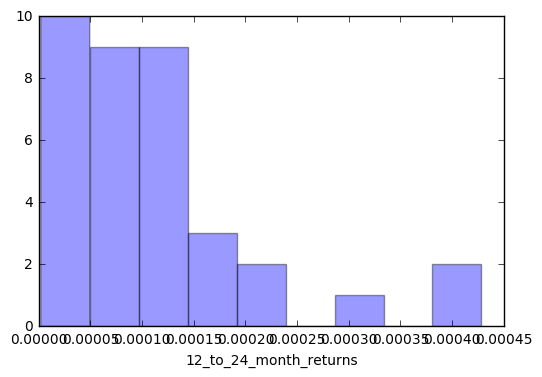

doe_total_rate  ,  2015


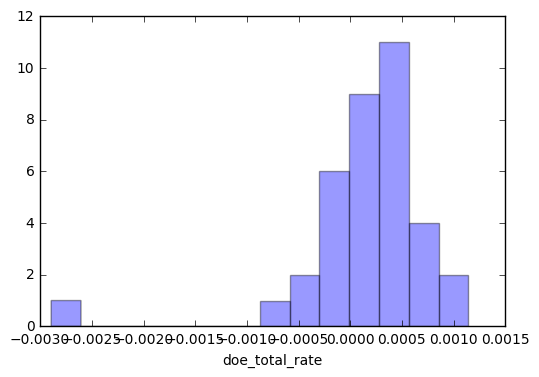

doe_total_rate  ,  2016


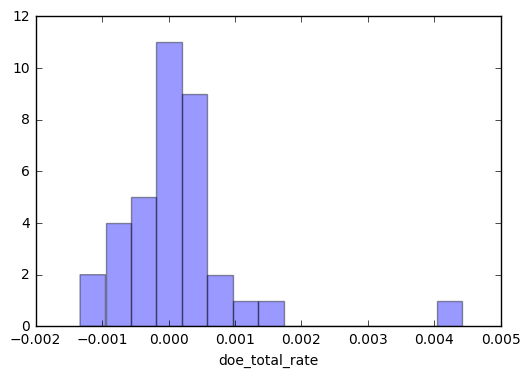

doe_total_rate  ,  2017


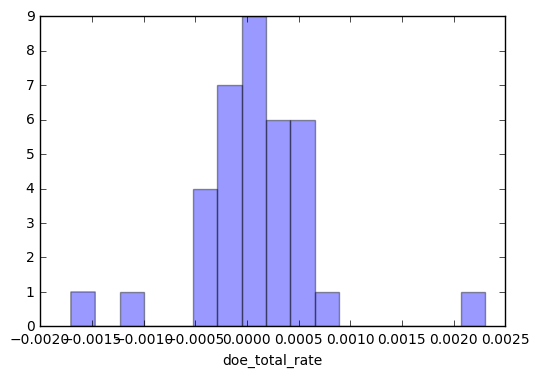

doe_unsheltered_rate  ,  2015


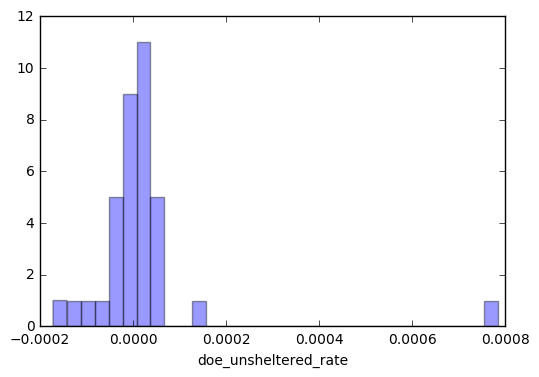

doe_unsheltered_rate  ,  2016


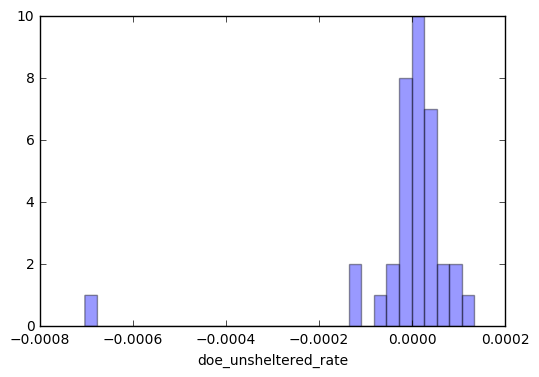

doe_unsheltered_rate  ,  2017


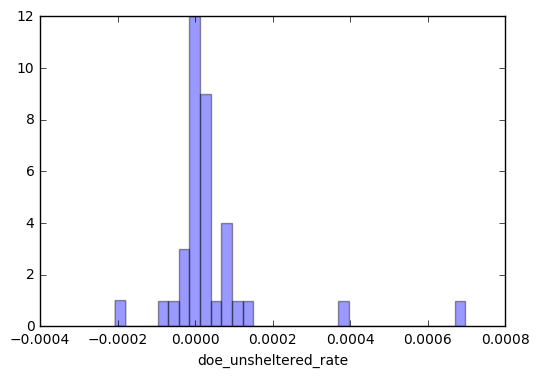

doe_sheltered_rate  ,  2015


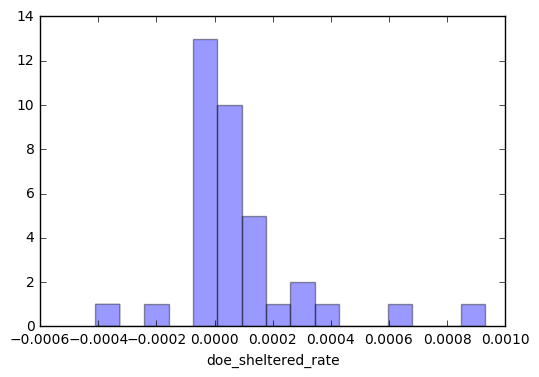

doe_sheltered_rate  ,  2016


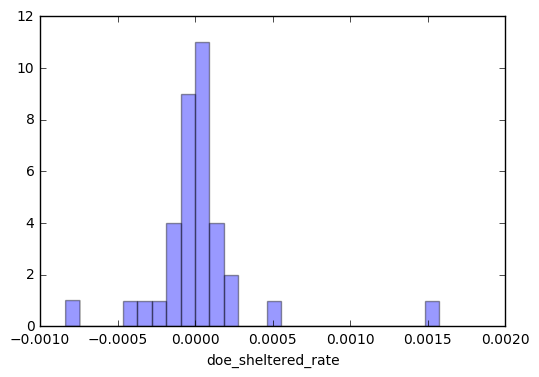

doe_sheltered_rate  ,  2017


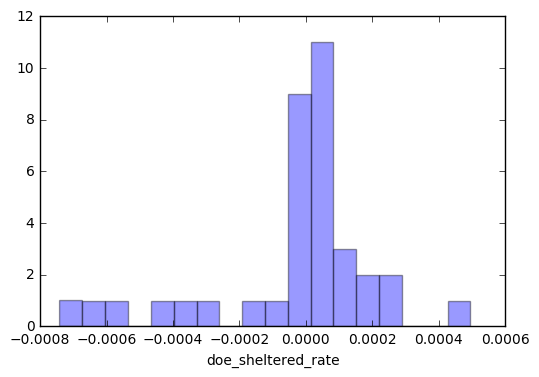

doe_hotel_motel_rate  ,  2015


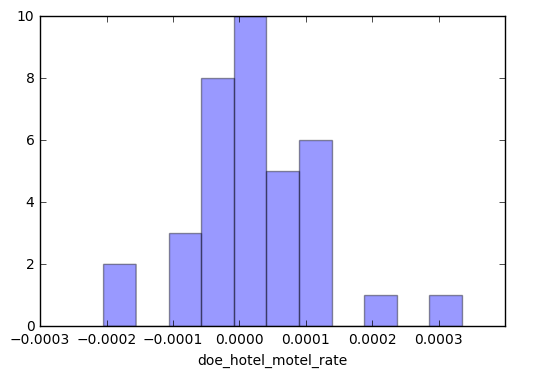

doe_hotel_motel_rate  ,  2016


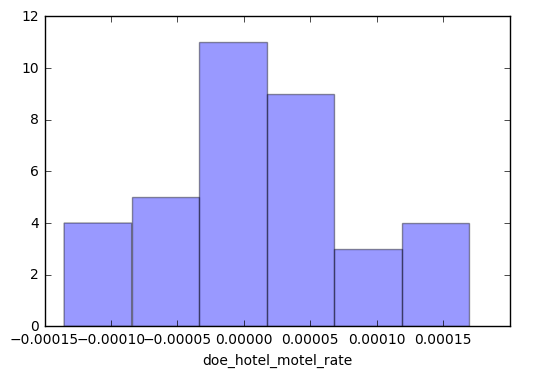

doe_hotel_motel_rate  ,  2017


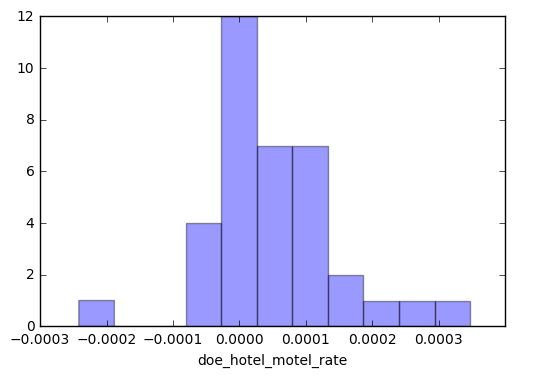

doe_doubled_up_rate  ,  2015


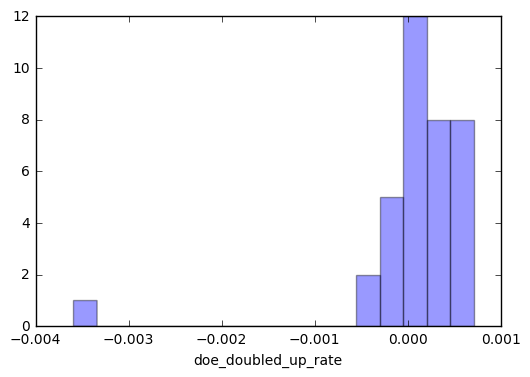

doe_doubled_up_rate  ,  2016


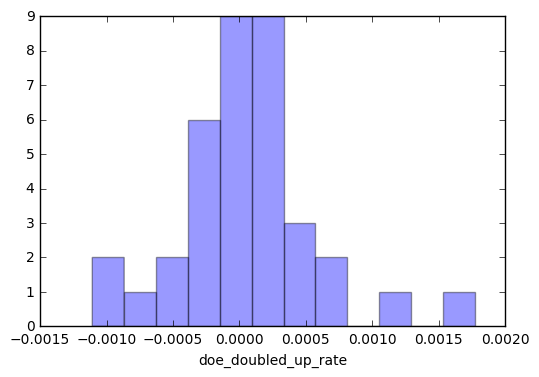

doe_doubled_up_rate  ,  2017


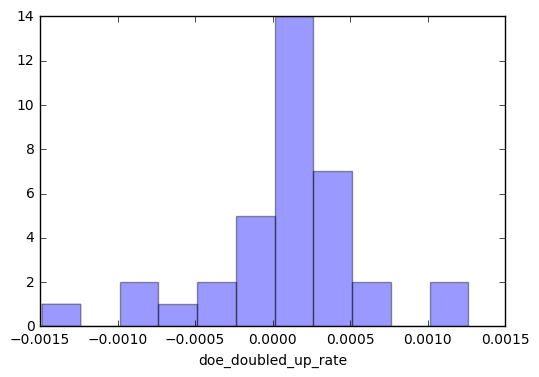

pprn  ,  2015


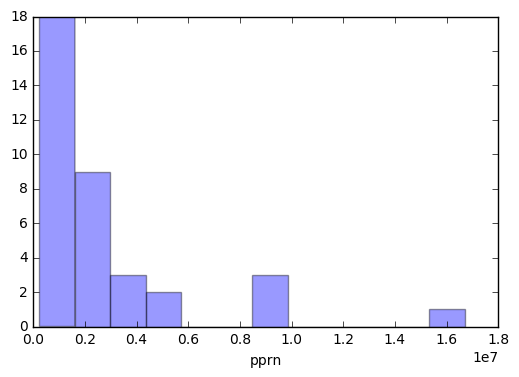

pprn  ,  2016


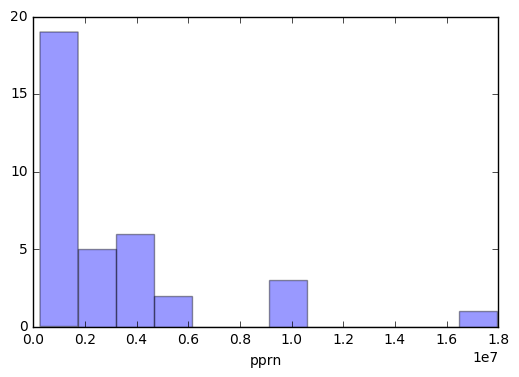

pprn  ,  2017


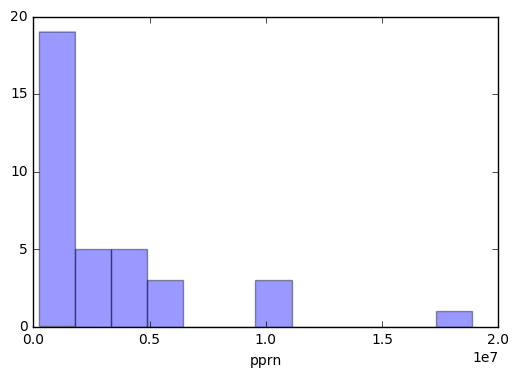

estimated_ard  ,  2015


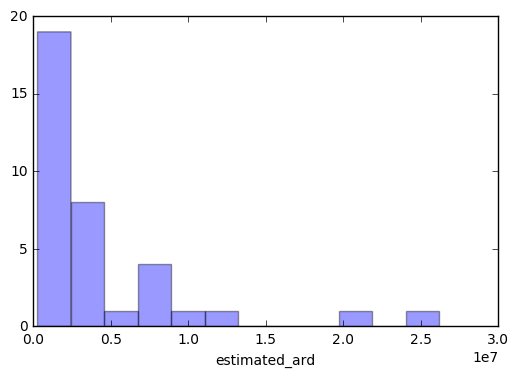

estimated_ard  ,  2016


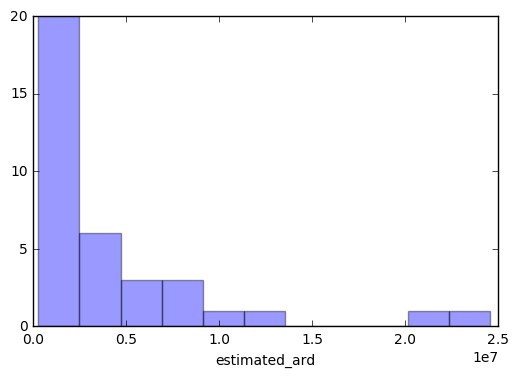

estimated_ard  ,  2017


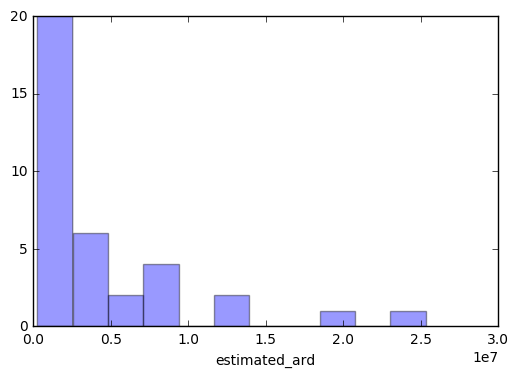

bonus  ,  2015


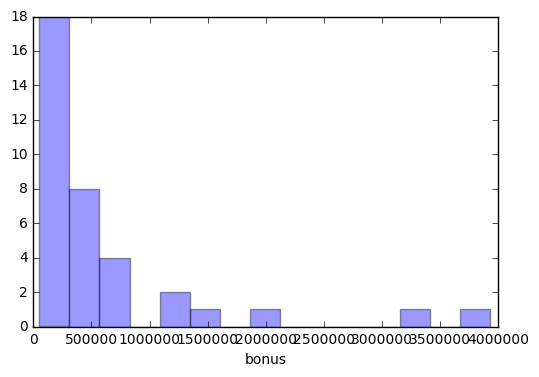

bonus  ,  2016


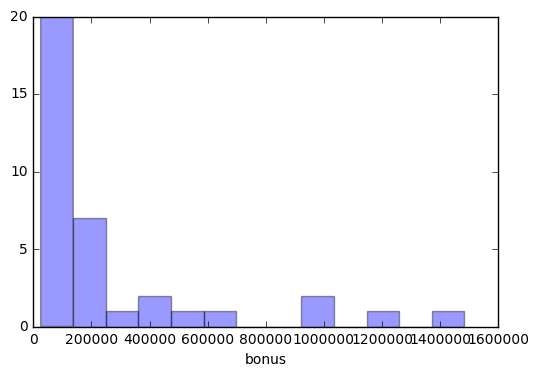

bonus  ,  2017


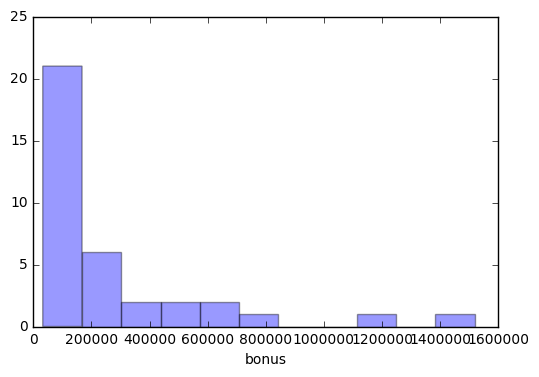

coc_planning  ,  2015


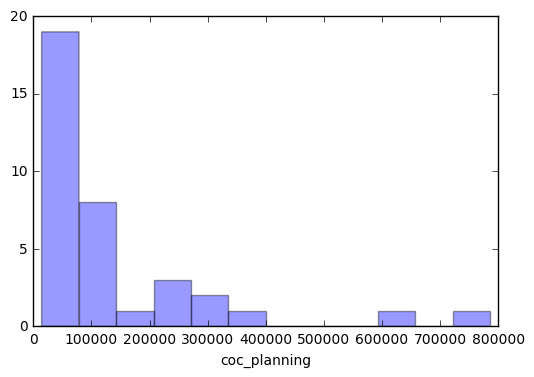

coc_planning  ,  2016


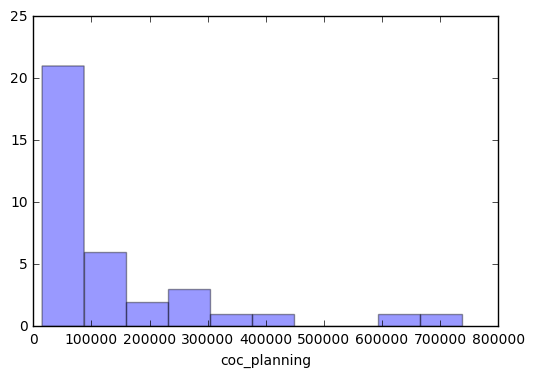

coc_planning  ,  2017


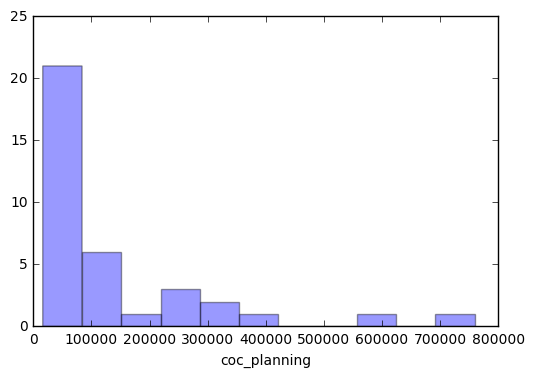

In [159]:
for col in normalized_modeling_data_space.columns[3:16]:
    for yr in normalized_modeling_data_space['year'].unique():
        print(col, ' , ', yr)
        sns.distplot(normalized_modeling_data_space[modeling_data_space['year'] == yr][col], kde = False)
        plt.show()

Normalizing the dataset reduces skewness and adds more meaningful variation to the distributions.

In [160]:
normalized_modeling_data_space.drop(columns = 'year').corr()

,total_returns,0_to_6_month_returns,6_to_12_month_returns,12_to_24_month_returns,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,doe_hotel_motel_rate,doe_doubled_up_rate,pprn,estimated_ard,bonus,coc_planning,Major Cities,Other Urban CoCs,Rural CoCs,Suburban CoCs
total_returns,1.000000,0.830499,0.933843,0.873068,0.100212,0.120551,0.084271,0.213660,0.089840,0.183284,0.355308,0.263319,0.338108,0.268691,-0.049730,-0.215847,0.055673
0_to_6_month_returns,0.830499,1.000000,0.875602,0.796293,-0.026648,0.102102,-0.090279,0.100231,-0.009110,0.048284,0.138607,0.090943,0.126471,0.108095,-0.026316,-0.134001,0.091830
6_to_12_month_returns,0.933843,0.875602,1.000000,0.866207,0.044825,0.190523,0.052752,0.175154,0.008985,0.184615,0.328536,0.244818,0.314148,0.278691,-0.032731,-0.247253,0.067637
12_to_24_month_returns,0.873068,0.796293,0.866207,1.000000,0.005556,0.130386,-0.007910,0.117779,0.012625,0.139382,0.270602,0.175344,0.254864,0.216525,-0.067674,-0.264874,0.195947
doe_total_rate,0.100212,-0.026648,0.044825,0.005556,1.000000,-0.059414,0.583236,0.308393,0.857694,0.022269,0.059613,-0.013533,0.059048,-0.005356,-0.037242,0.069445,-0.044634
doe_unsheltered_rate,0.120551,0.102102,0.190523,0.130386,-0.059414,1.000000,0.088466,0.150575,-0.359140,0.008172,0.028150,0.051127,0.027344,0.167874,0.113618,-0.209382,-0.028037
doe_sheltered_rate,0.084271,-0.090279,0.052752,-0.007910,0.583236,0.088466,1.000000,0.171830,0.232289,0.056017,0.133537,0.178859,0.132556,0.120521,-0.003912,-0.024738,-0.090899
doe_hotel_motel_rate,0.213660,0.100231,0.175154,0.117779,0.308393,0.150575,0.171830,1.000000,0.216951,0.103263,0.136472,0.164565,0.138374,0.124733,0.067876,-0.181022,0.031289
doe_doubled_up_rate,0.089840,-0.009110,0.008985,0.012625,0.857694,-0.359140,0.232289,0.216951,1.000000,-0.000541,0.023553,-0.041014,0.022220,-0.114129,-0.068445,0.150220,-0.001167
pprn,0.183284,0.048284,0.184615,0.139382,0.022269,0.008172,0.056017,0.103263,-0.000541,1.000000,0.936756,0.762201,0.955404,0.609955,-0.300963,-0.139717,-0.127188


Normalizing data weakens correlations. More meaningful interpretation of correlations can be found above for the raw model space.

# Transforming Model Space

In [161]:
national_time_series = modeling_data_space.groupby('year').sum().drop(columns = ['Major Cities', 'Other Urban CoCs', 'Rural CoCs', 'Suburban CoCs'])
national_time_series.head()

,total_returns,0_to_6_month_returns,6_to_12_month_returns,12_to_24_month_returns,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,doe_hotel_motel_rate,doe_doubled_up_rate,pprn,estimated_ard,bonus,coc_planning
year,,,,,,,,,,,,,
2015,356373,34211,17121,20395,-68228,-4406,-9236,1505,-51027,1388668379,1800277047,288727511,53632237
2016,400592,37441,19168,24281,74198,6458,13637,4416,46006,1483403314,1843886524,99584690,55276148
2017,453260,41519,21157,25821,39392,6400,-5528,4930,32479,1546650856,1887209663,123302439,56943343


In [169]:
national_totals = national_time_series.sum(axis = 0)
national_totals.head()

total_returns             1210225
0_to_6_month_returns       113171
6_to_12_month_returns       57446
12_to_24_month_returns      70497
doe_total_rate              45362
dtype: int64

In [170]:
states_time_series = modeling_data_space.groupby(['state', 'year']).sum()
states_time_series.head()

total_returns  0_to_6_month_returns  6_to_12_month_returns  \
state year                                                               
AK    2015            769                   126                     34   
      2016           1039                   175                     45   
      2017           1270                   144                     51   
AL    2015           2154                   282                    105   
      2016           2010                   210                     75   

            12_to_24_month_returns  doe_total_rate  doe_unsheltered_rate  \
state year                                                                 
AK    2015                      51             180                   -35   
      2016                      54             925                    97   
      2017                      75            -914                   -12   
AL    2015                     130             279                  -166   
      2016                     105           -5117                   -58   

            doe_sheltered_rate  doe_hotel_motel_rate  doe_doubled_up_rate  \
state year                                                                  
AK    2015                 125                   -59                  118   
      2016                 284                    49                  508   
      2017                -583                  -121                 -213   
AL    2015                 342                   -60                   89   
      2016                -502                  -148                -4650   

                pprn  estimated_ard    bonus  coc_planning  Major Cities  \
state year                                                                 
AK    2015   1740416        3631777   544767        108953             0   
      2016   1839211        3629739   181487        108893             0   
      2017   1917406        3588242   215294        107647             0   
AL    2015  14935229       16031815  2968469        593694             0   
      2016  15327065       16898755   991250        594750             0   

            Other Urban CoCs  Rural CoCs  Suburban CoCs  
state year                                               
AK    2015                 1           1              0  
      2016                 1           1              0  
      2017                 1           1              0  
AL    2015                 4           2              1  
      2016                 4           2              1

In [171]:
state_totals = modeling_data_space.groupby(['state']).sum().drop(columns = 'year')
state_totals.head()

,total_returns,0_to_6_month_returns,6_to_12_month_returns,12_to_24_month_returns,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,doe_hotel_motel_rate,doe_doubled_up_rate,pprn,estimated_ard,bonus,coc_planning,Major Cities,Other Urban CoCs,Rural CoCs,Suburban CoCs
state,,,,,,,,,,,,,,,,,
AK,3078,445,130,180,191,50,-174,-131,413,5497033,10849758,941548,325493,0,3,3,0
AL,6070,794,331,376,-3051,-116,-38,-173,-2801,46252496,49750370,5148322,1782747,0,12,6,3
AR,3724,328,148,193,1376,-9,-253,24,909,15398501,13887371,1866693,633538,0,6,6,0
AZ,26156,2820,1464,1703,-2927,-141,-2055,592,-1819,79625393,112928388,9914011,3387851,6,0,3,0
CA,120277,9436,5419,7164,-41026,604,-3046,2062,-39736,604692963,997498904,86662820,25307886,24,24,24,51


total_returns


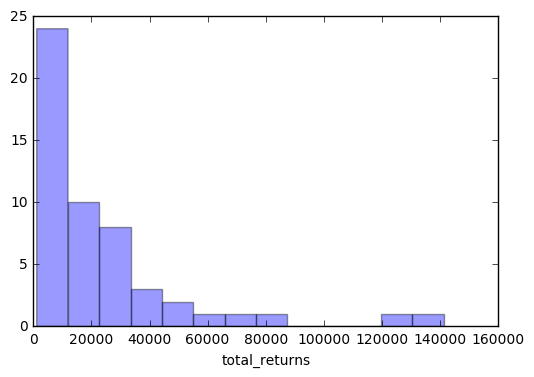

0_to_6_month_returns


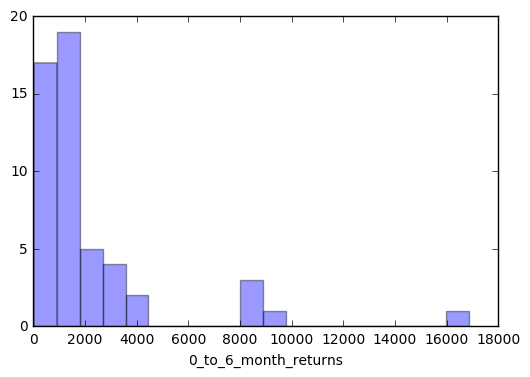

6_to_12_month_returns


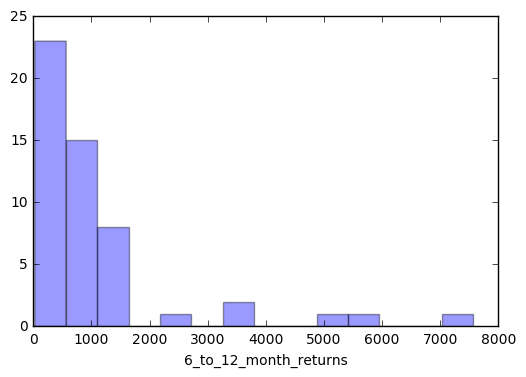

12_to_24_month_returns


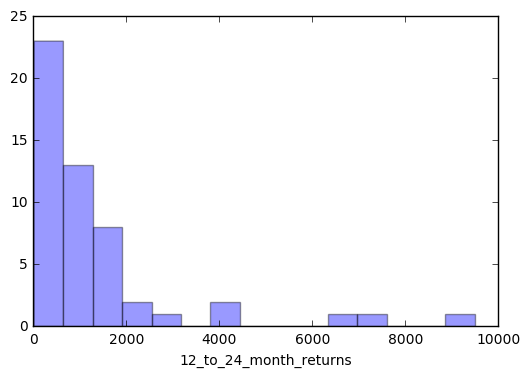

doe_total_rate


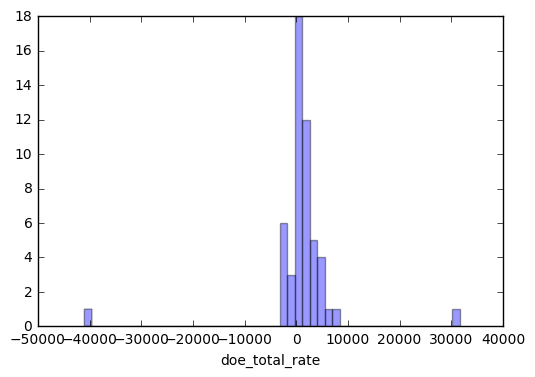

doe_unsheltered_rate


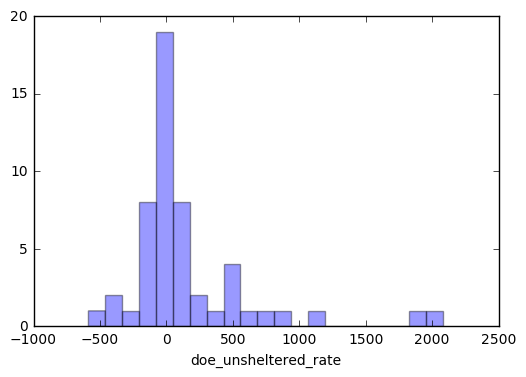

doe_sheltered_rate


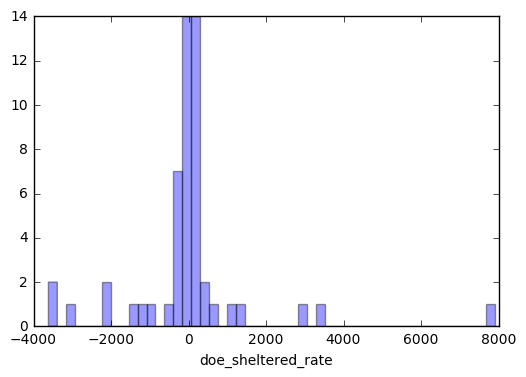

doe_hotel_motel_rate


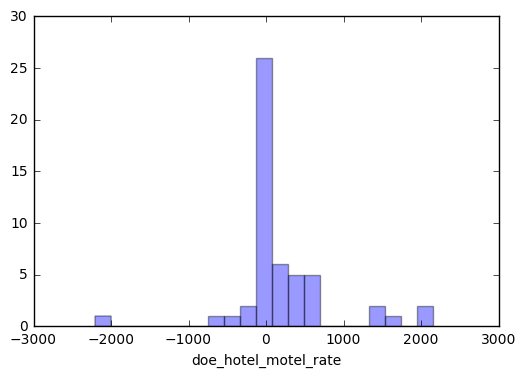

doe_doubled_up_rate


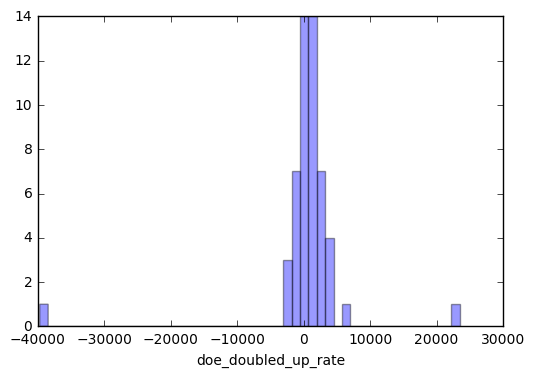

pprn


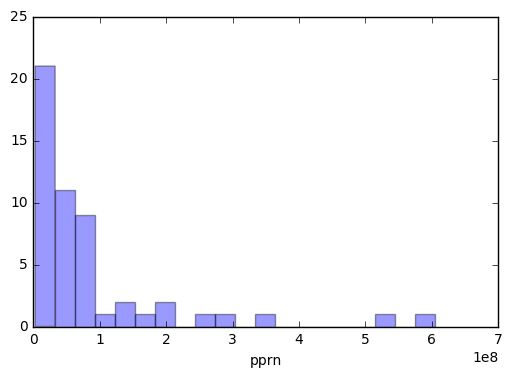

estimated_ard


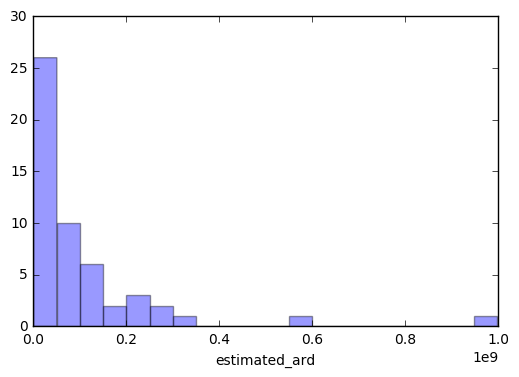

bonus


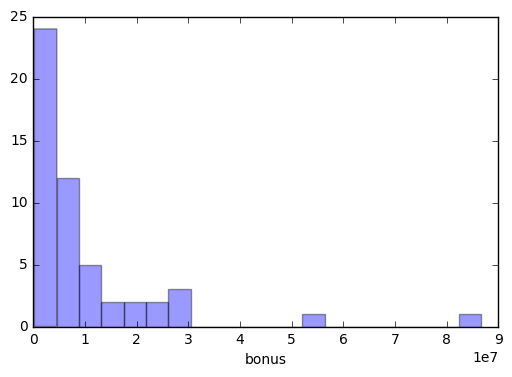

coc_planning


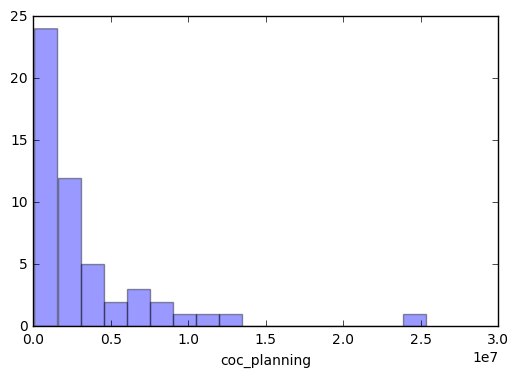

Major Cities


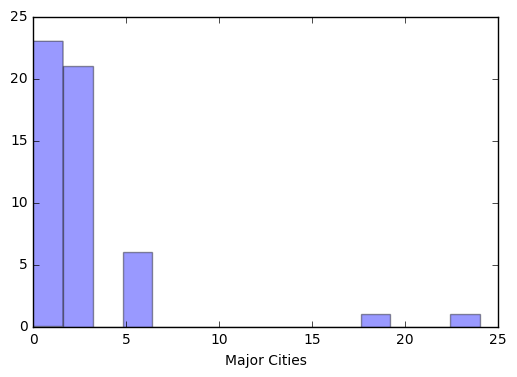

Other Urban CoCs


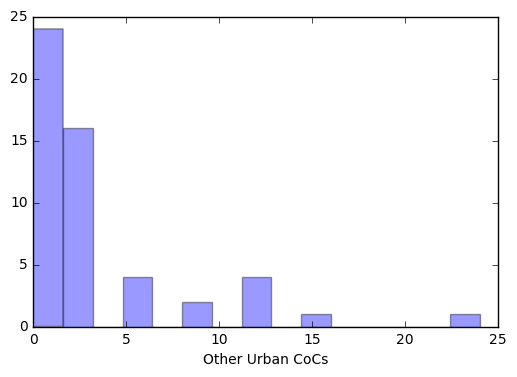

Rural CoCs


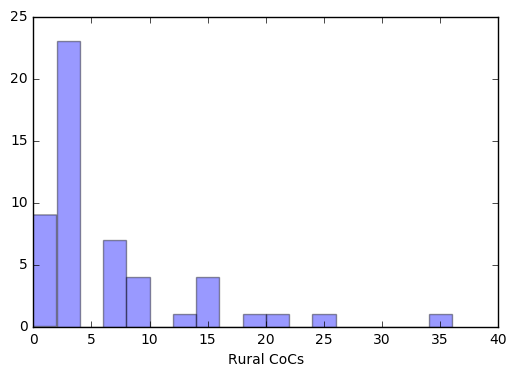

Suburban CoCs


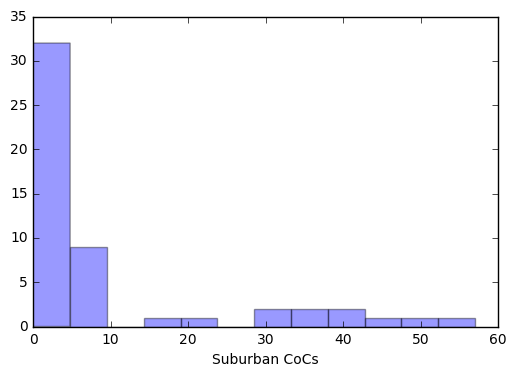

In [172]:
for col in state_totals.columns:
    print(col)
    sns.distplot(state_totals[col], kde = False)
    plt.show()

In [173]:
coc_totals = modeling_data_space.groupby('cocnumber').sum().drop(columns = 'year')
coc_totals.to_csv('coc_totals.csv', index = False)
coc_totals.head()

,total_returns,0_to_6_month_returns,6_to_12_month_returns,12_to_24_month_returns,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,doe_hotel_motel_rate,doe_doubled_up_rate,pprn,estimated_ard,bonus,coc_planning,Major Cities,Other Urban CoCs,Rural CoCs,Suburban CoCs
cocnumber,,,,,,,,,,,,,,,,,
AK-500,2549,422,112,156,321,31,-58,-103,451,3517995,8565834,739261,256975,0,3,0,0
AK-501,529,23,18,24,-130,19,-116,-28,-38,1979038,2283924,202287,68518,0,0,3,0
AL-500,2440,478,190,204,-716,5,-118,84,-479,17177292,25715142,2204214,771454,0,0,0,3
AL-501,1336,141,68,83,-357,-118,106,-335,-16,8866321,11411779,991702,342353,0,3,0,0
AL-502,0,0,0,0,-168,-19,-46,-2,-107,1116419,938041,61523,33492,0,0,2,0


total_returns


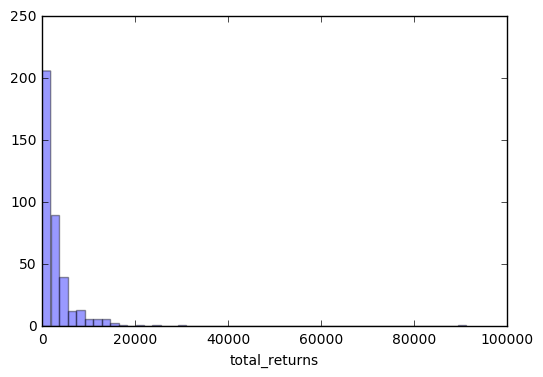

0_to_6_month_returns


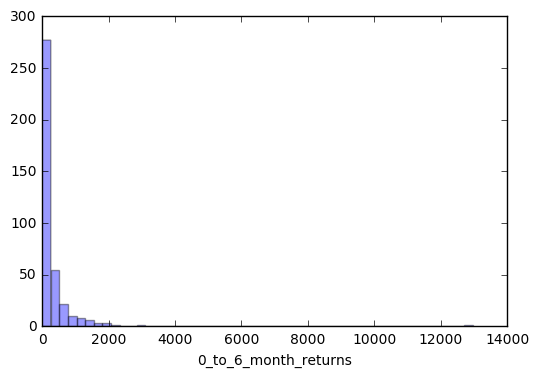

6_to_12_month_returns


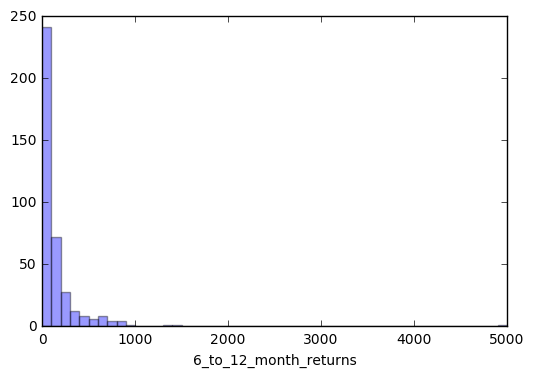

12_to_24_month_returns


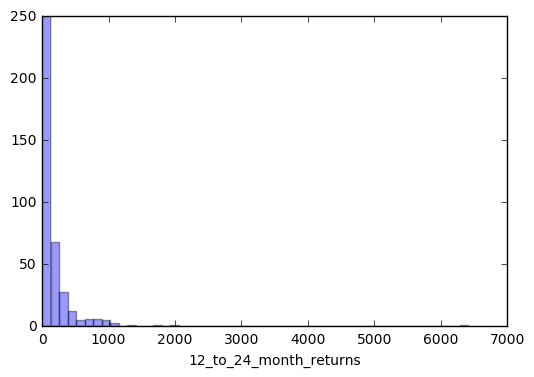

doe_total_rate


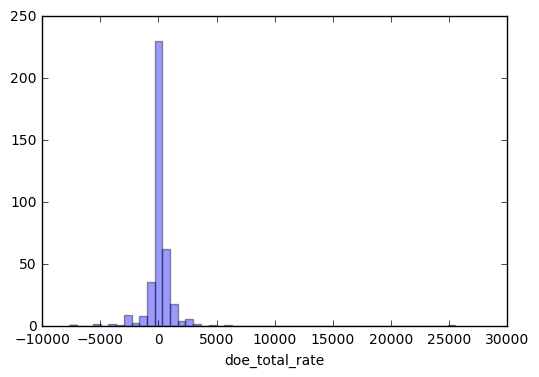

doe_unsheltered_rate


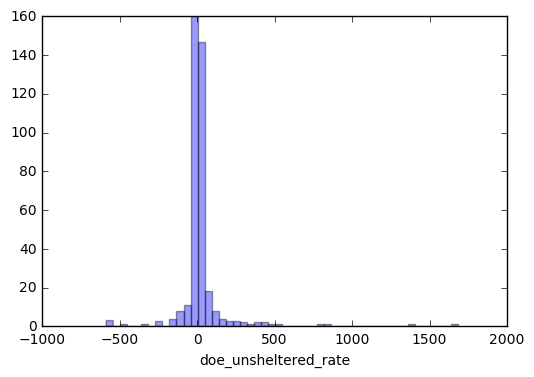

doe_sheltered_rate


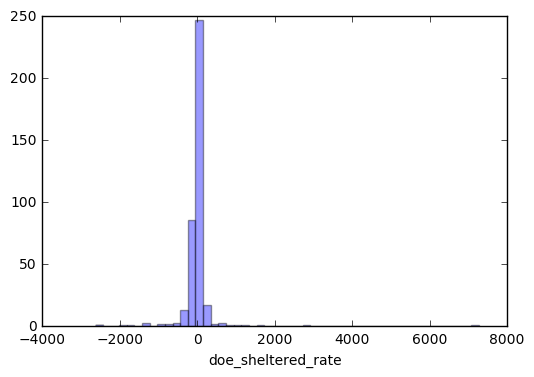

doe_hotel_motel_rate


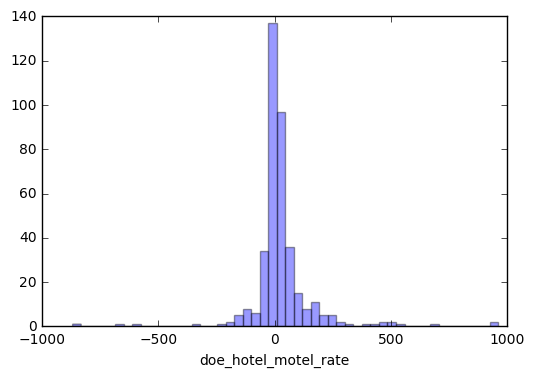

doe_doubled_up_rate


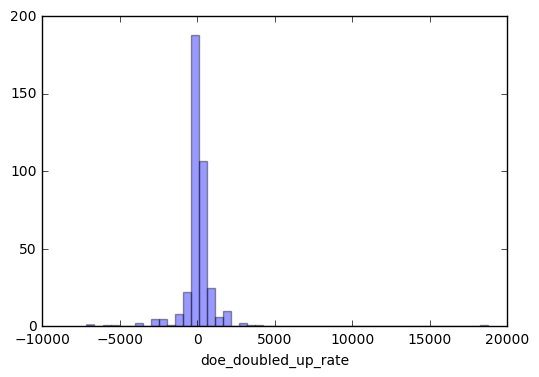

pprn


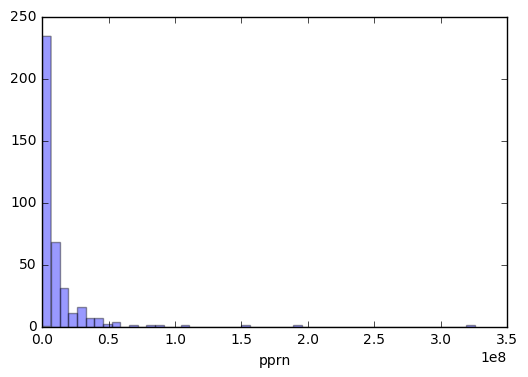

estimated_ard


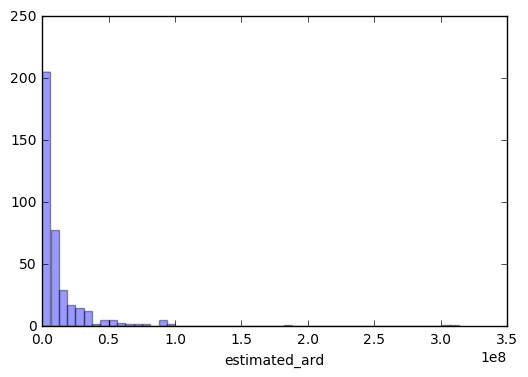

bonus


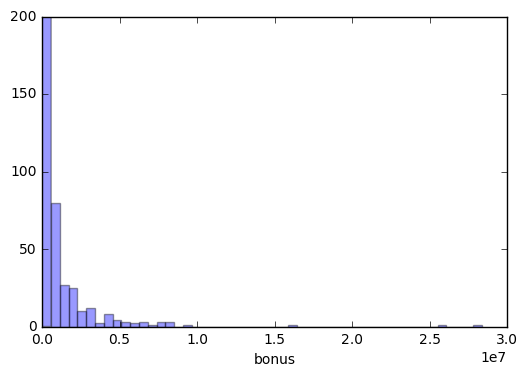

coc_planning


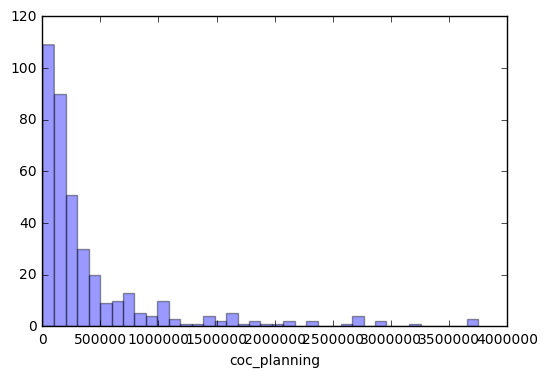

Major Cities


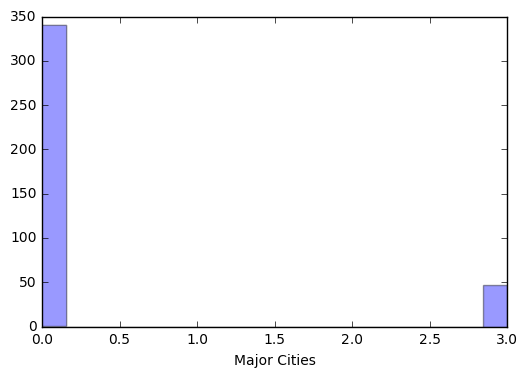

Other Urban CoCs


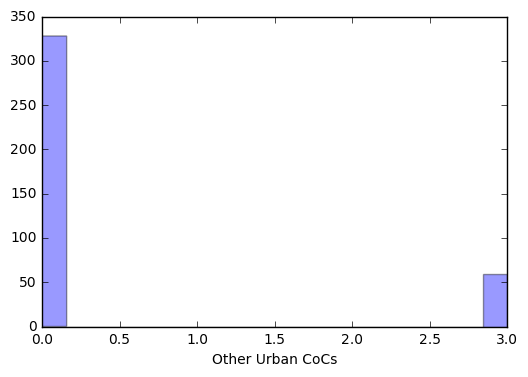

Rural CoCs


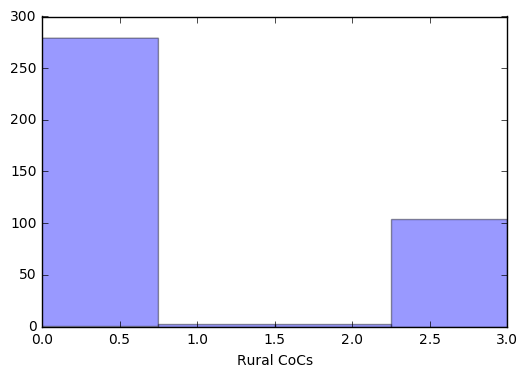

Suburban CoCs


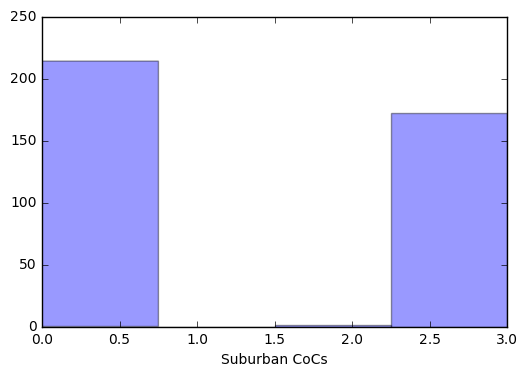

In [174]:
for col in coc_totals.columns:
    print(col)
    sns.distplot(coc_totals[col], kde = False)
    plt.show()

Not much new information was gained by the above transformations.

In [122]:
coc_category_totals = modeling_data_space.groupby('coc_category').sum().drop(columns = 'year')
coc_urban = coc_category_totals.loc['Major Cities',:] + coc_category_totals.loc['Other Urban CoCs',:]
coc_non_urban = coc_category_totals.loc['Suburban CoCs',:] + coc_category_totals.loc['Rural CoCs',:]

coc_new_category_total = pd.DataFrame(index = ['Urban CoCs', 'Non Urban CoCs'], columns = coc_urban.index, data = [coc_urban, coc_non_urban])
coc_new_category_total

,total_returns,0_to_6_month_returns,6_to_12_month_returns,12_to_24_month_returns,doe_total_rate,doe_unsheltered_rate,doe_sheltered_rate,doe_hotel_motel_rate,doe_doubled_up_rate,pprn,estimated_ard,bonus,coc_planning,Major Cities,Other Urban CoCs,Rural CoCs,Suburban CoCs
Urban CoCs,540423.0,56950.0,28211.0,34750.0,18511.0,6320.0,-878.0,3597.0,11179.0,2.142461e+09,2.971250e+09,260184439.0,77807368.0,141.0,177.0,0.0,0.0
Non Urban CoCs,669802.0,56221.0,29235.0,35747.0,26851.0,2132.0,-249.0,7254.0,16279.0,2.276261e+09,2.560123e+09,251430201.0,88044360.0,0.0,0.0,318.0,518.0


Here we see recidivism is much higher in non urban coc categories while unsheltered students are much higher in urban categories. We also see that while funding is about equal in aggregate, there are much fewer urban cocs than non urban.

# Summary

The data suggests that the HUD is taking a brute force approach on tackling homelessness. That is, putting the most money where people are most densely distributed. Our data shows that homelessness counts in urban and non urban areas are about equal yet much more people in non urban areas are returning to shelters. Meanwhile in cities, the funding correlates to the population as a whole rather than considering the different needs of different marginilized communities within the homeless population (e.g. Students).

A minority of CoCs are getting the majority of funding while key homelessness metrics get worse. The HUD should take a more granular approach, considering regional needs and the needs of marginilized populations.